In [1]:
import os
import sys
import numpy as np
import math
import copy
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sys.path.insert(0, '..')

In [121]:
from util.plot import get_pd

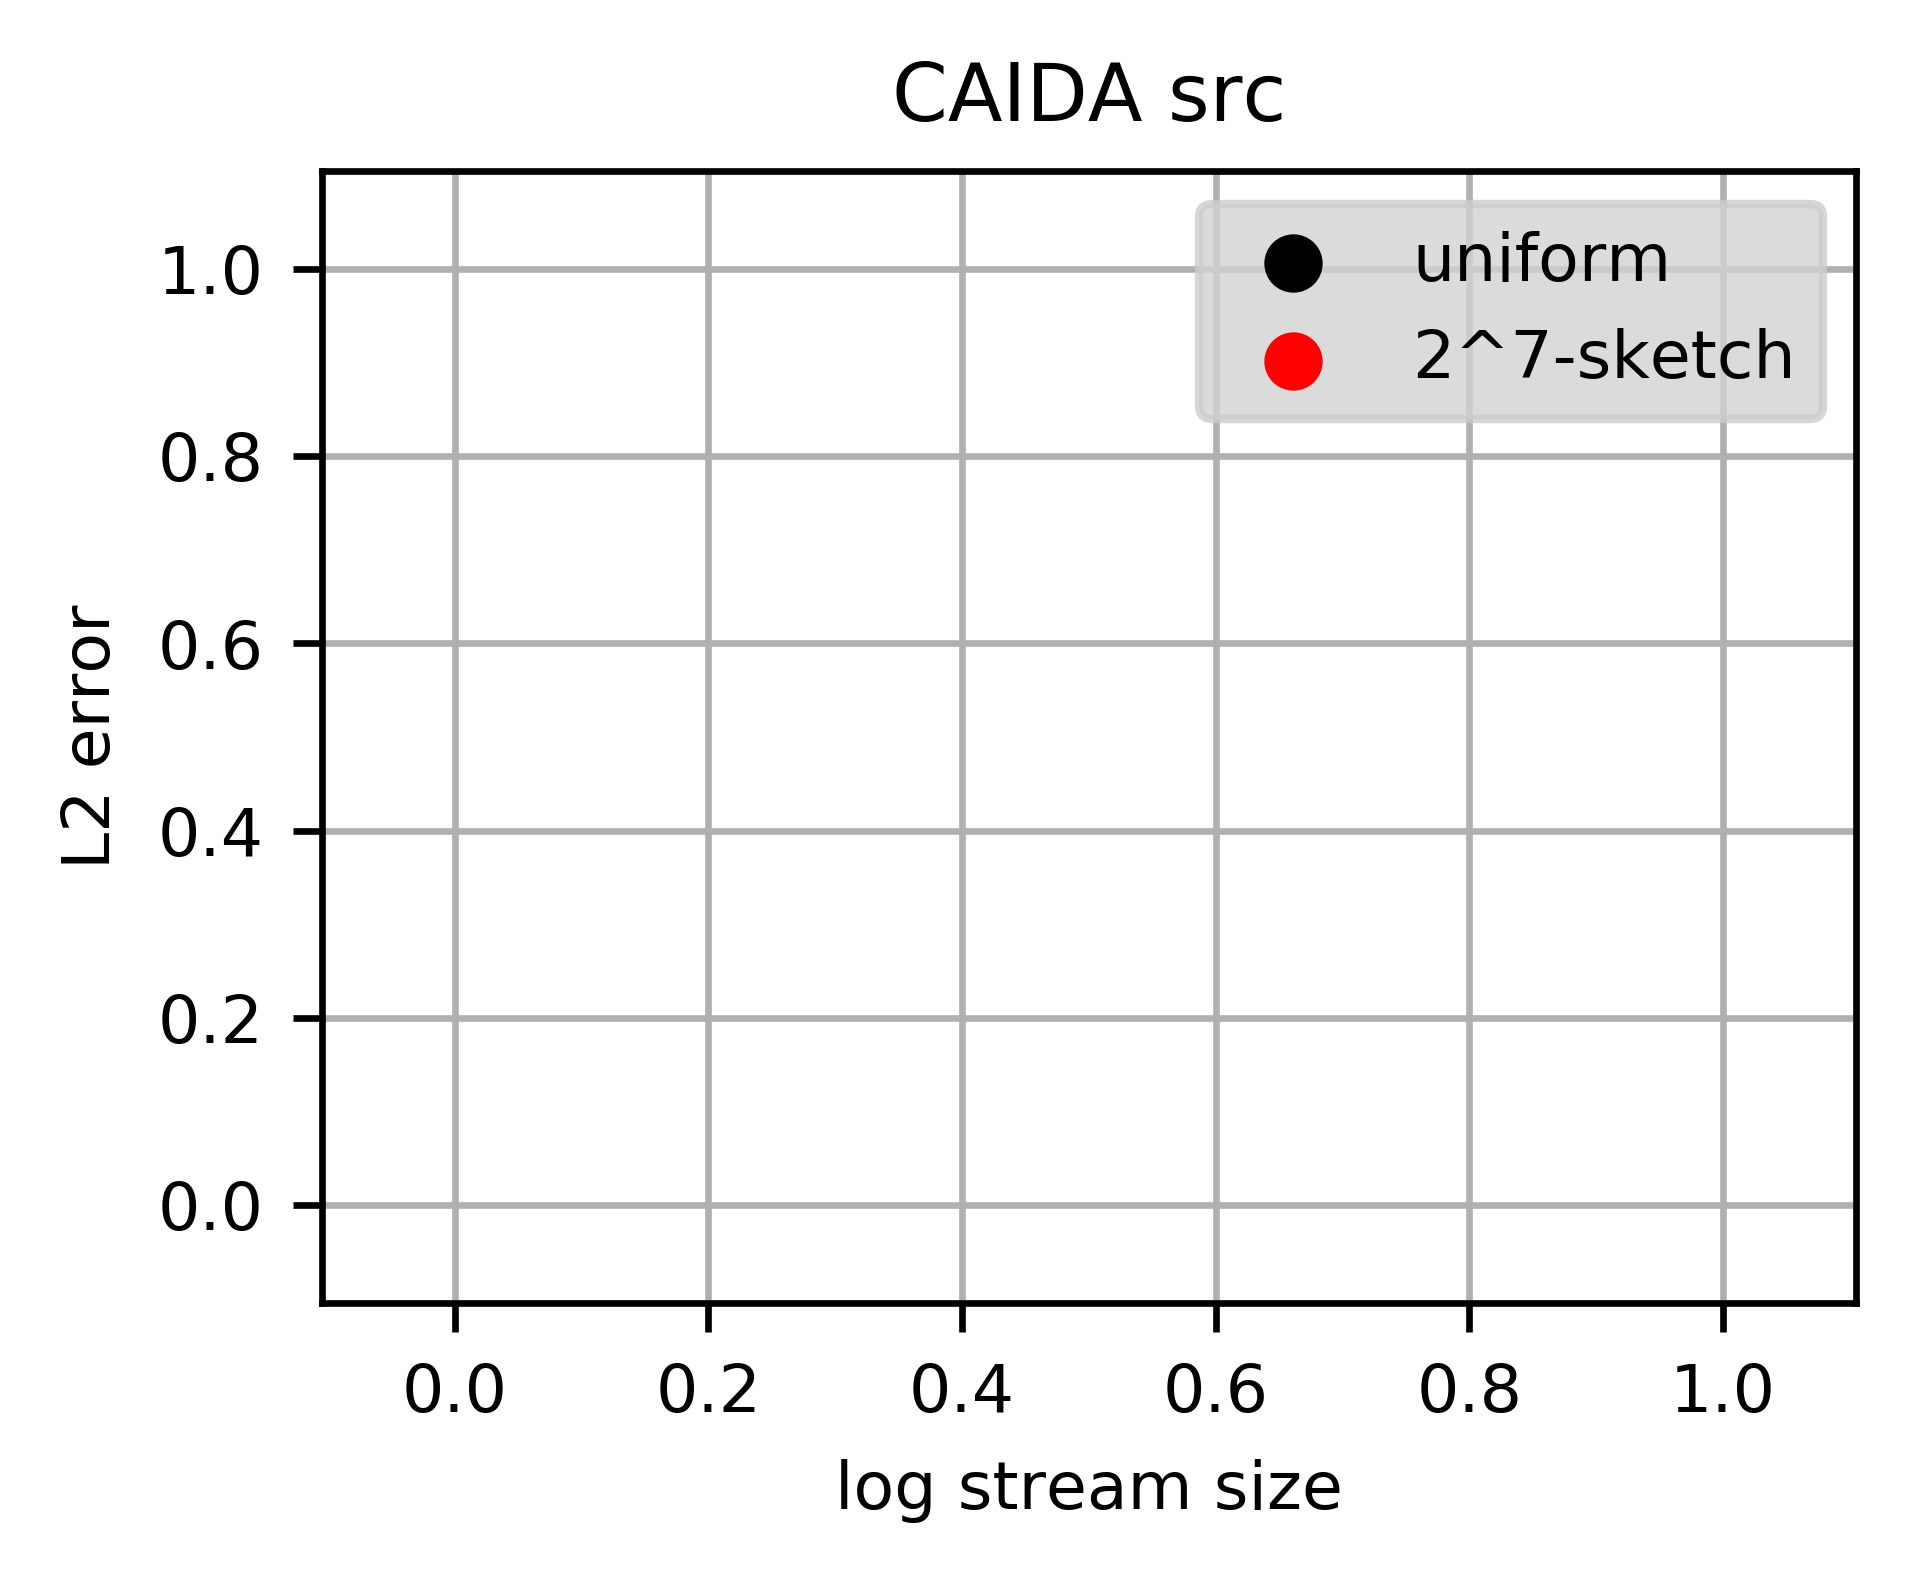

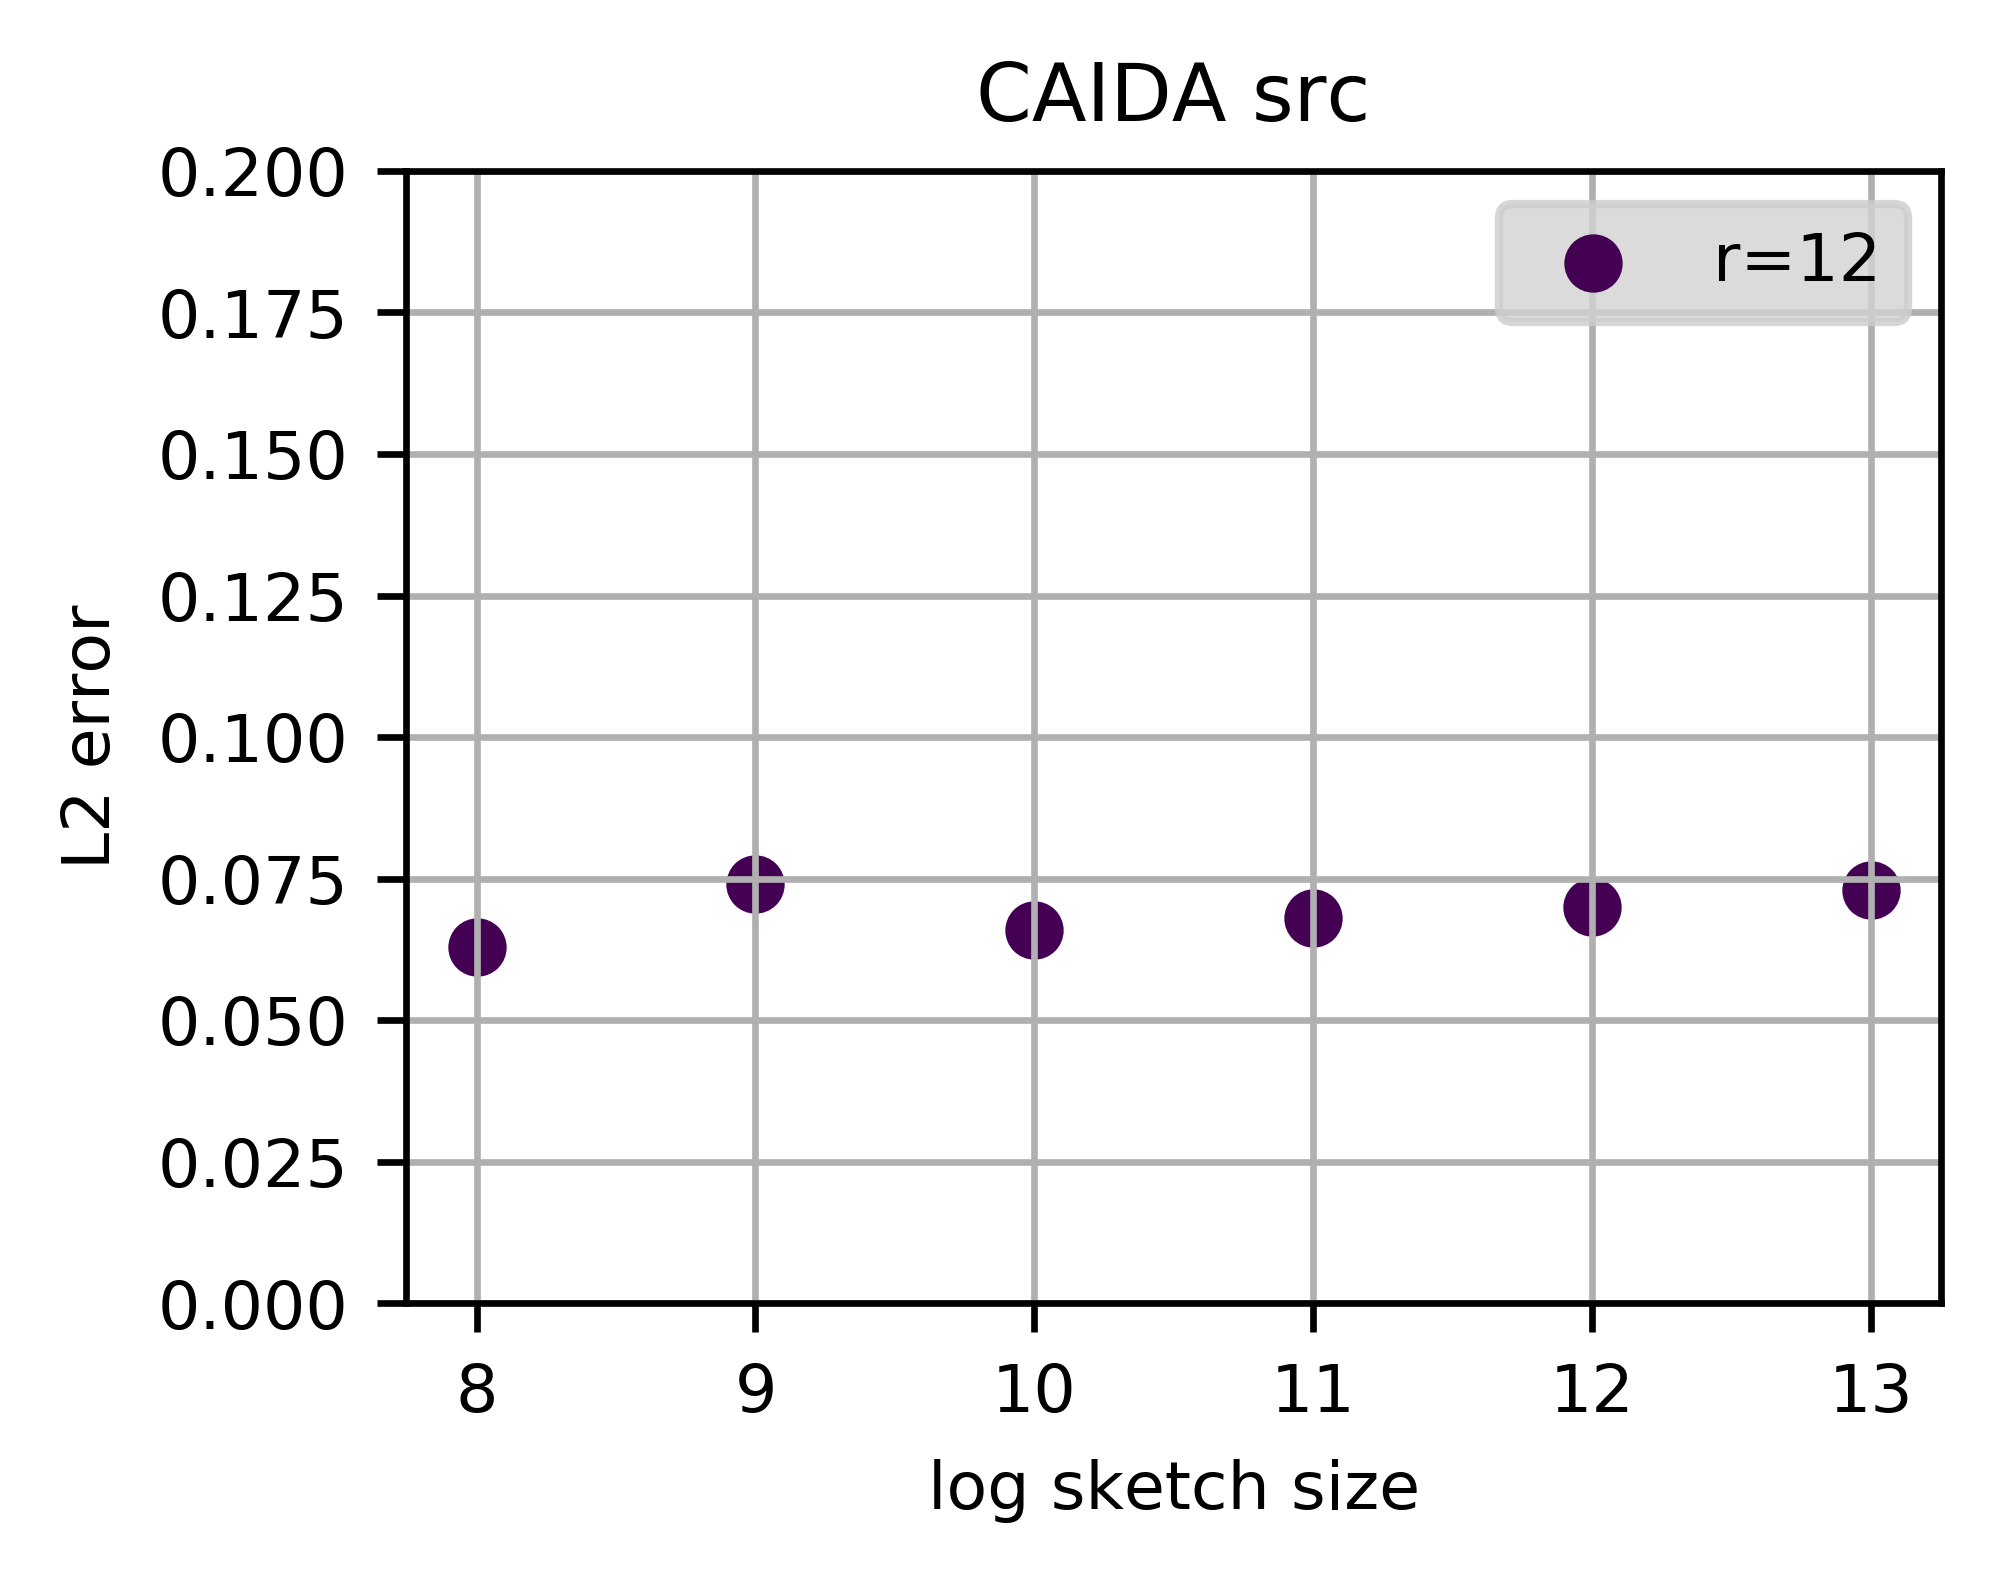

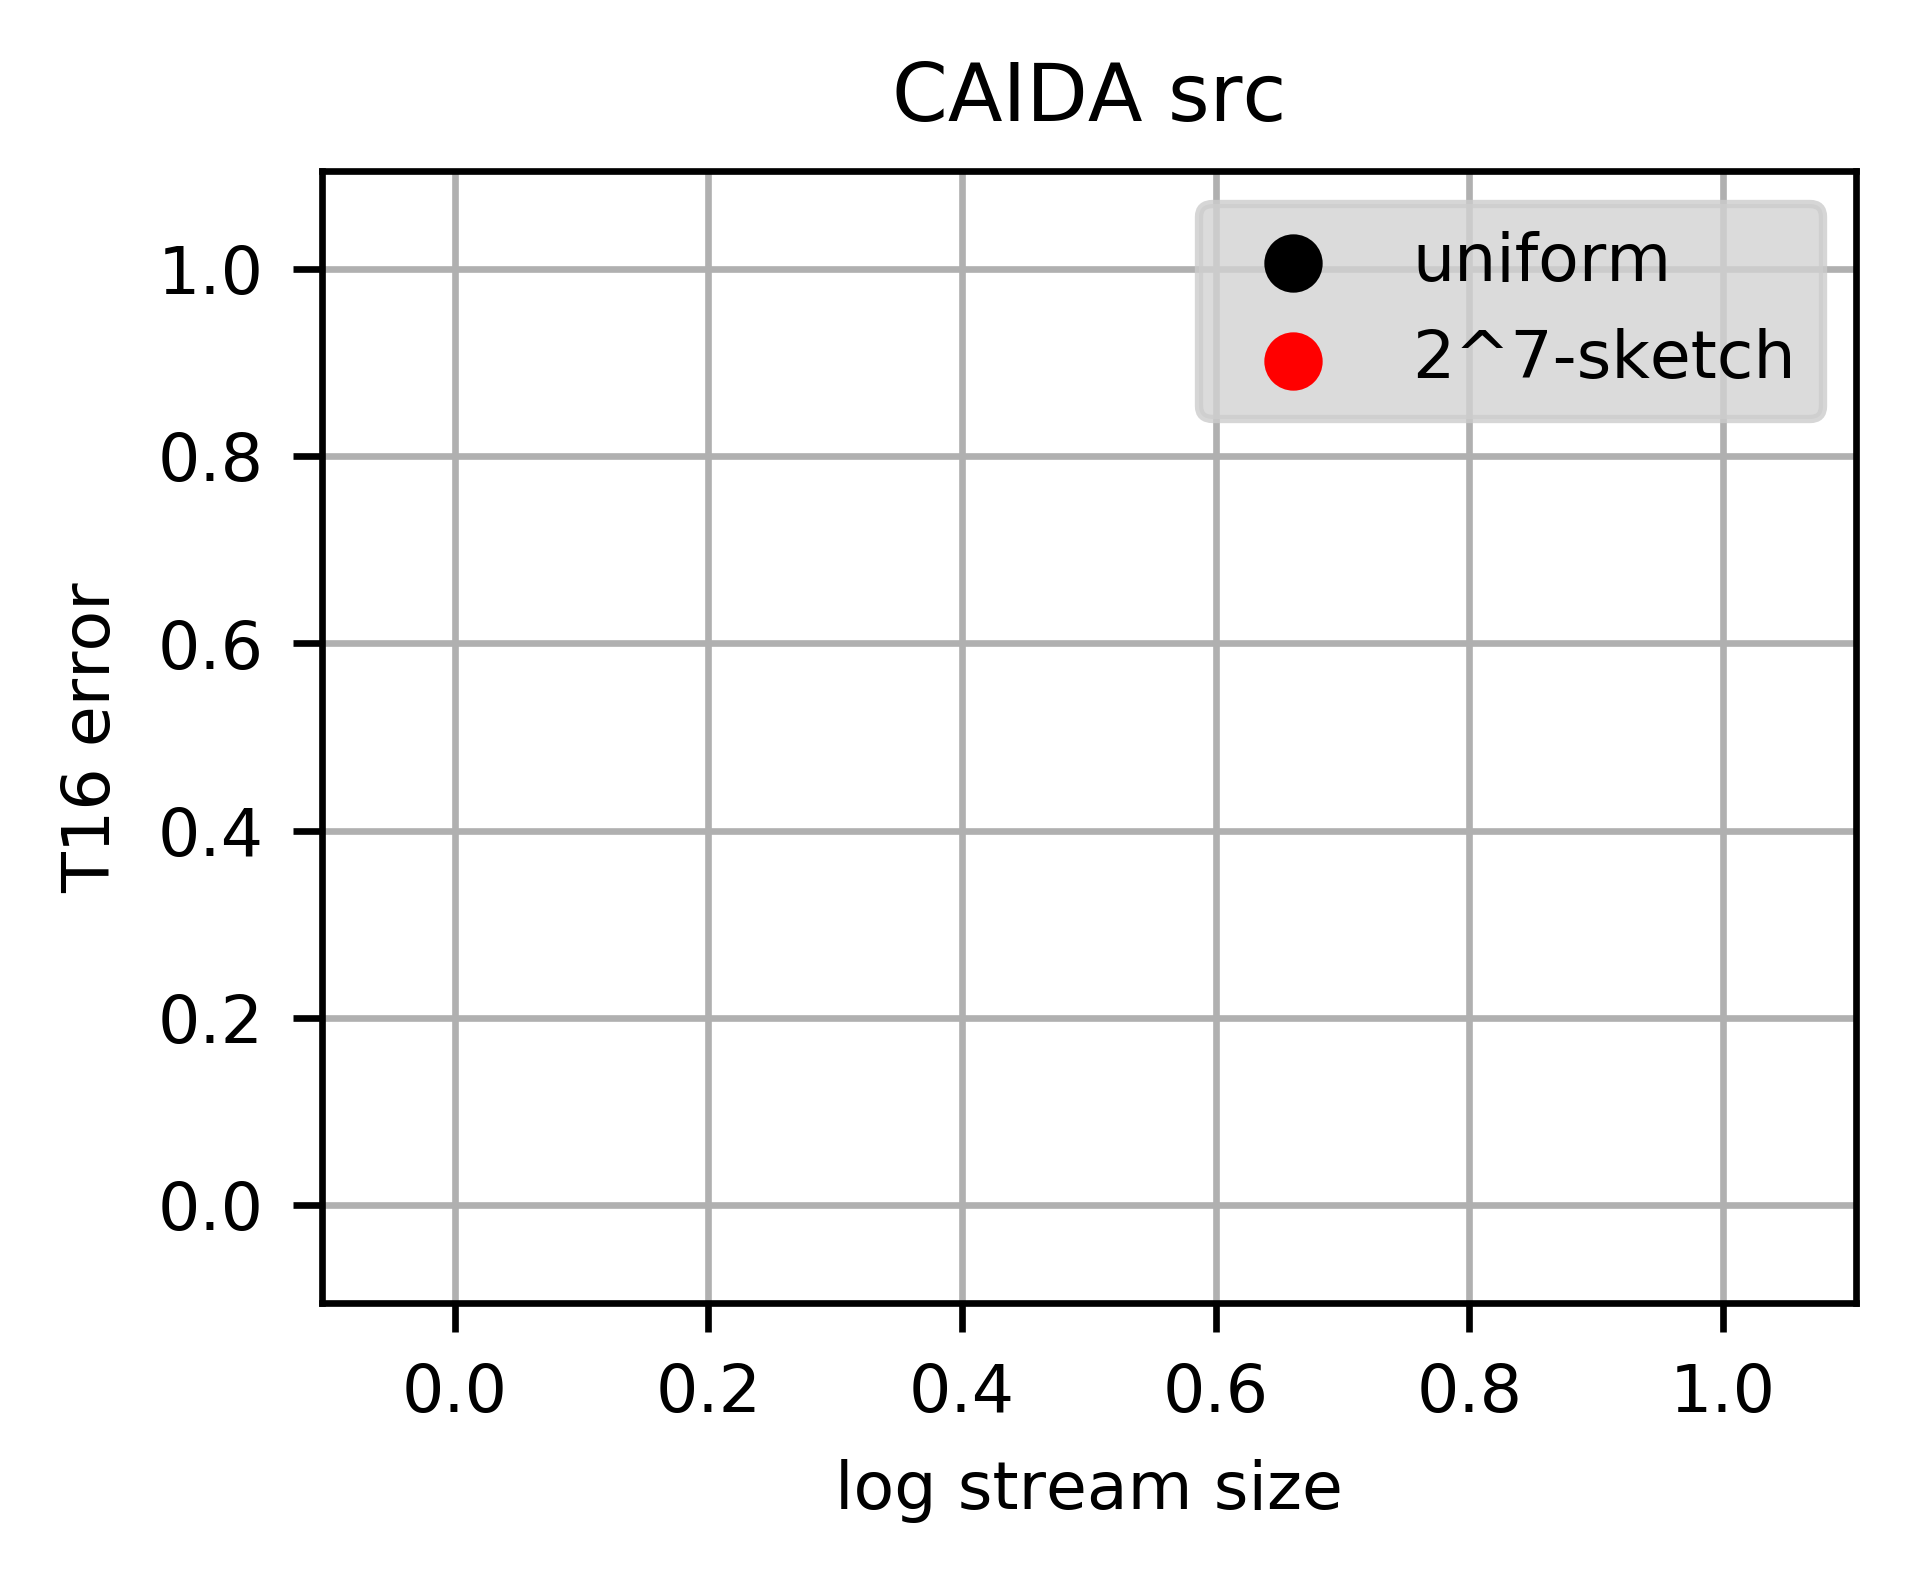

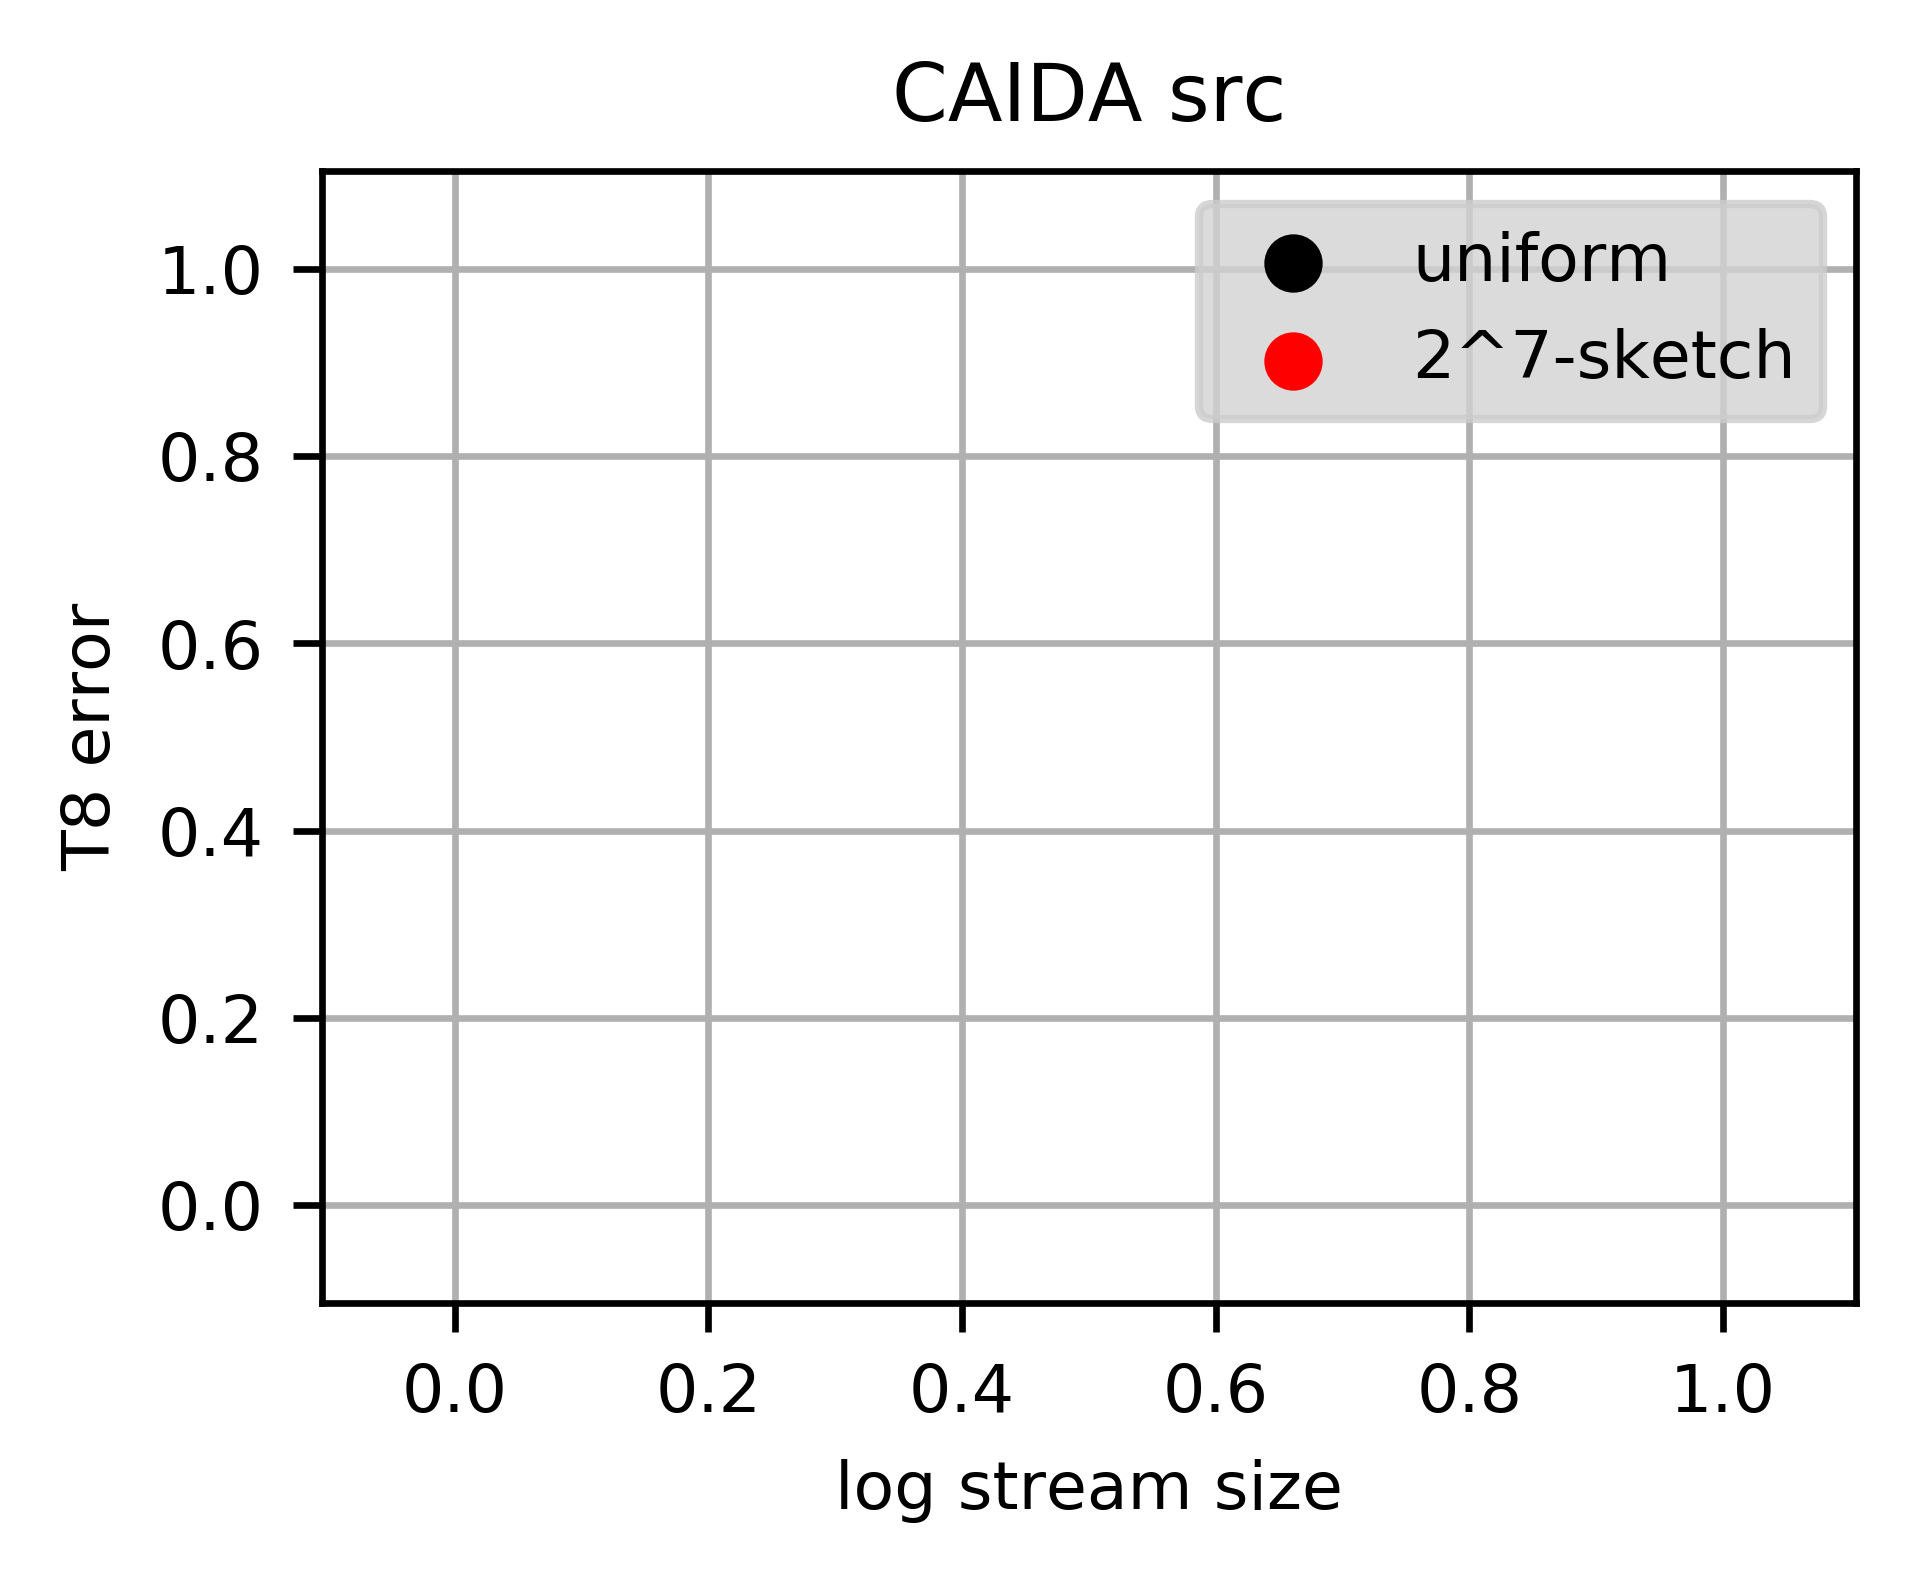

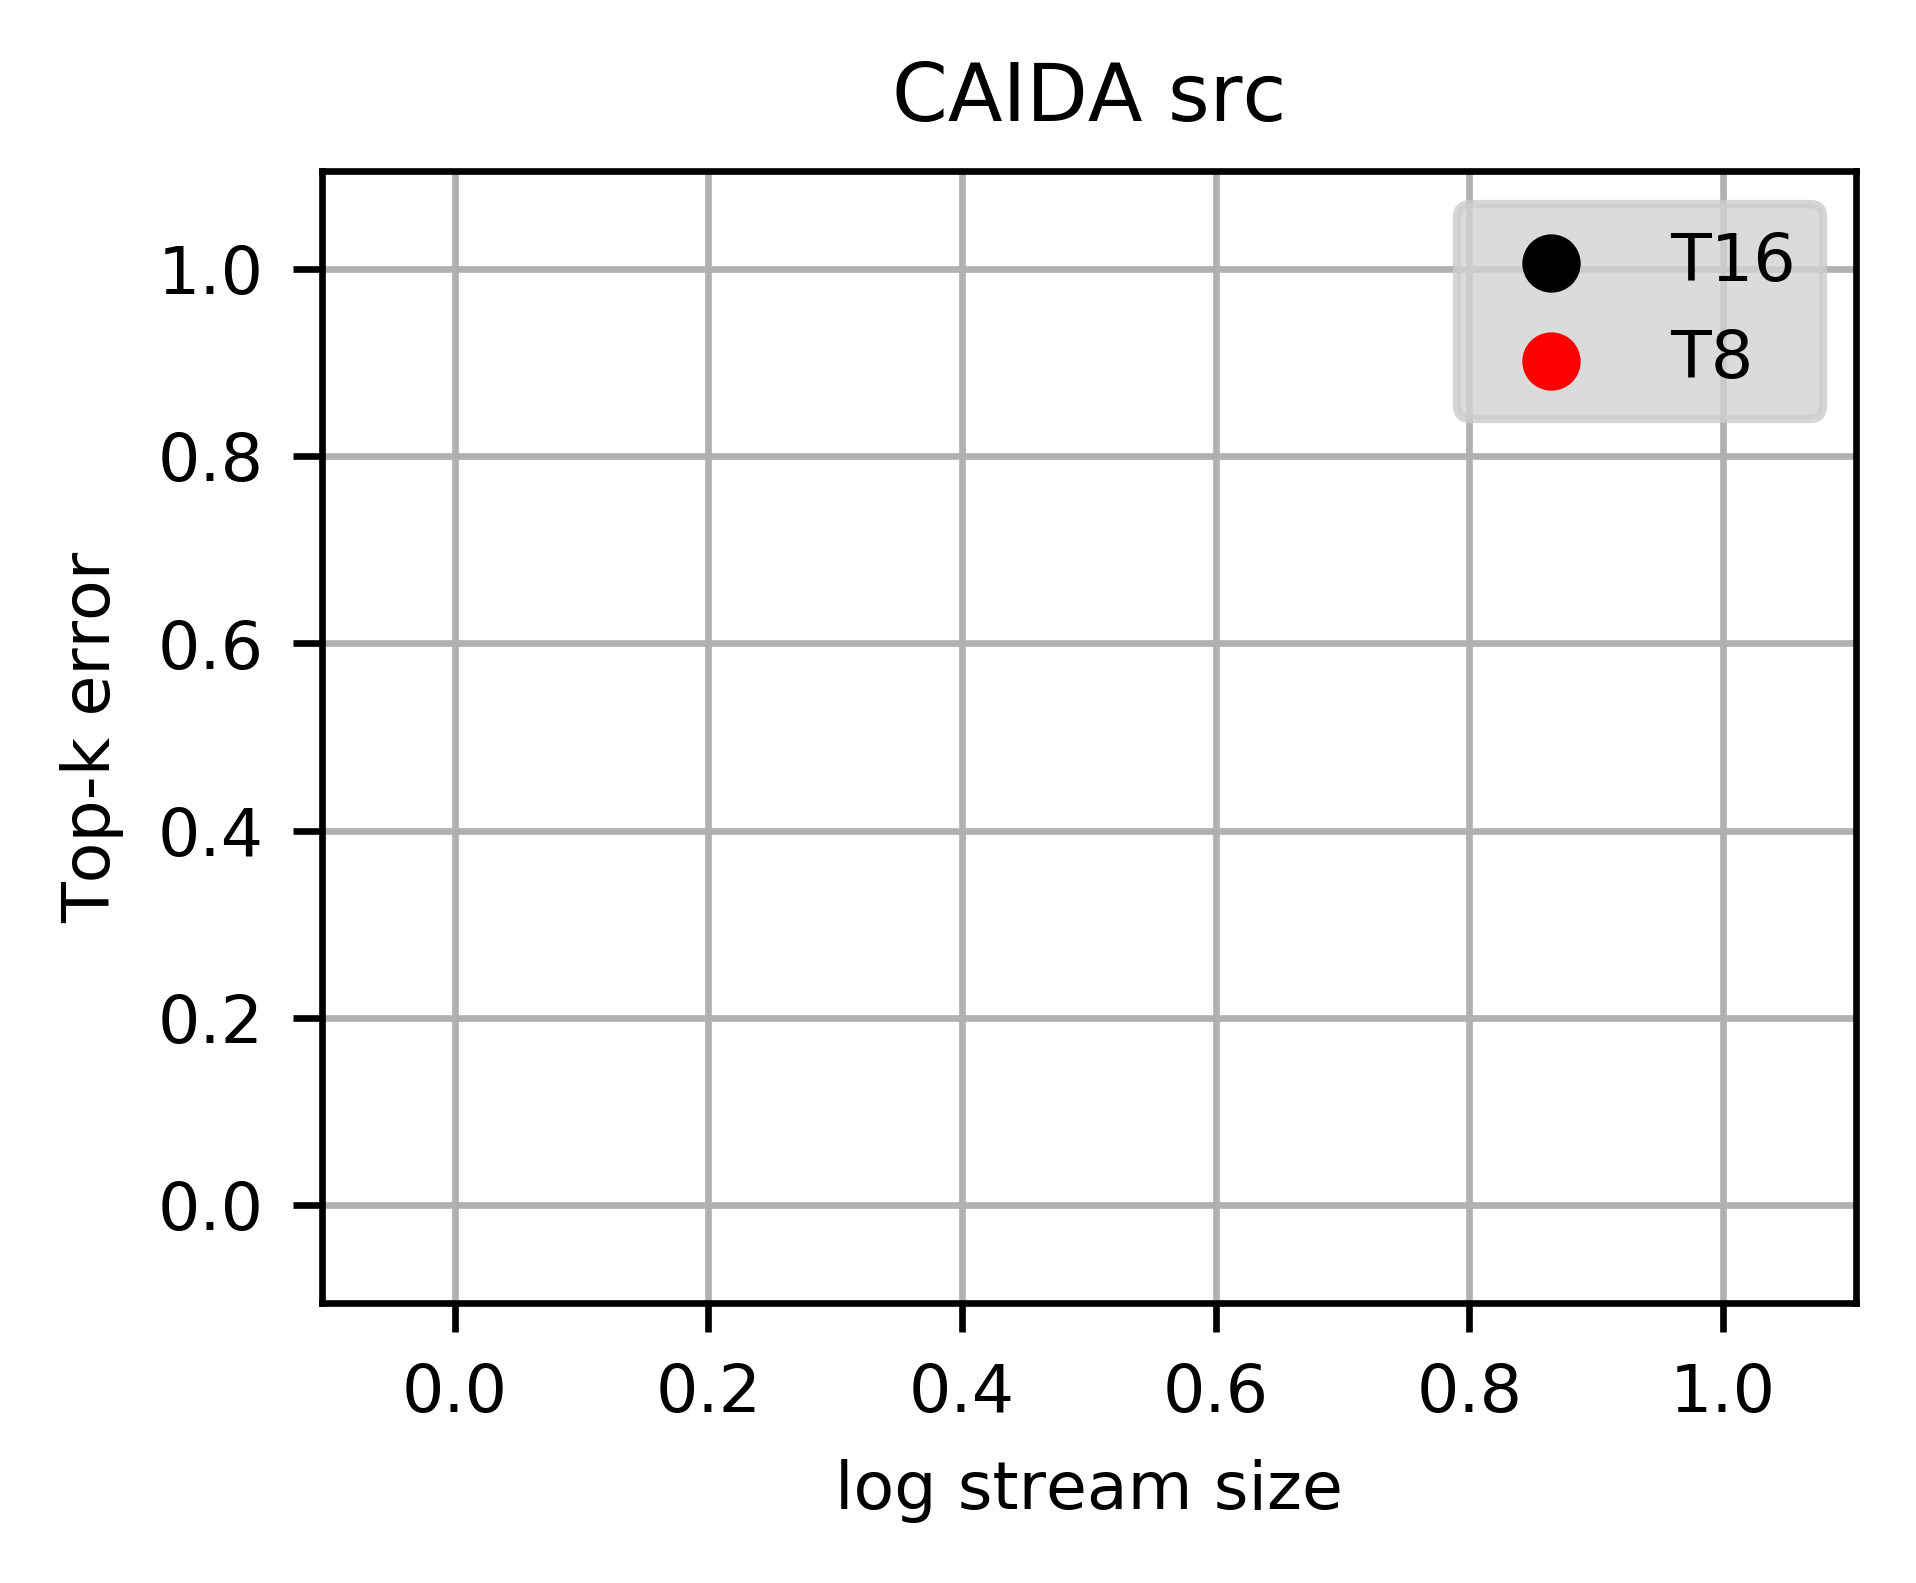

In [445]:
get_folder_plots('out_src_r16',errbar=False) 

In [452]:
def get_folder_plots(folder, save=True,crVal=7, root='/home/swei20/SymNormSlidingWindows/', errbar=True):
    DATADIR = root + folder
    srcFiles = os.listdir(DATADIR)
    for file in srcFiles:
        plt.figure()
        _= get_pd(DATADIR, file,save=save,crVal=crVal, errbar=errbar) 
    plt.figure()
    tkFiles =  [srcFiles[i]  for i in range(len(srcFiles)) if srcFiles[i][0]=='T']
    _= get_pd(DATADIR, tkFiles[0],tkFiles[1],save=save,crVal=crVal, errbar=errbar)    
    return None
def get_csv(DATADIR, filename):
    normType, ftr, loop = filename.split('_')[0], filename.split('_')[1], filename.split('_')[2]
    path = os.path.join(DATADIR, filename)   
    out = pd.read_csv(path)
    return out,normType, ftr, loop
def get_pd(DATADIR, filename, FILE2=None, errbar=False, save=True,crVal=7):
    out,normType, ftr, loop = get_csv(DATADIR,filename)
    if FILE2 is not None:
        out2,normType2, ftr2, loop2 = get_csv(DATADIR,FILE2)
        assert ftr == ftr2
        outs = [out,out2]
        normTypes = [normType, normType2]
        plot_topk_norms(ftr, outs, normTypes, crVal=crVal)
        if save: plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}{normType2}.png',bbox_inches = 'tight')
        return outs
    if loop=='mL':
        plot_error(ftr, out, normType, errbar,crVal=crVal)  

    elif loop == 'csL':
        plot_size_error(ftr,out, normType,errbar =errbar)
    if save: plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}_{loop}.png',bbox_inches = 'tight')
    return out,ftr,normType

def plot_topk_norms(ftr, outs, normTypes, crVal=7):
    for ii, out in enumerate(outs):
        normType = normTypes[ii]
        outR = out[out['cr']== crVal]
        plt.scatter(np.log2(outR['m']), outR['errCs'], label = f'{normType}')
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'Top-k error')
    plt.xlabel('log stream size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')

def plot_error(ftr, out, normType, errbar, crVal = 6,cols=['errUn','errCs']):
    labels=['uniform', f'2^{crVal}-sketch', r'$\mathregular{10^{{crVal}}$']
    outR = out[out['cr']==crVal]
    for i, col in enumerate(cols): 
        plt.scatter(np.log2(outR['m']), outR[col], label = f'{labels[i]}')
    if errbar: plt.errorbar(np.log2(outR['m']), outR['errCs'], outR['std']/outR['ex'], c='r',alpha=0.3)
        
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log stream size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')
def plot_size_error(ftr, out, normType, errbar=False):
    rList = out['r'].unique()
    colors = cm.get_cmap('viridis')(np.linspace(0,1,len(rList)))
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        plt.scatter(outR['cr'], outR['errCs'], color = colors[i] ,label=f'r={r}')
        if errbar: plt.errorbar(outR['cr'], outR['errCs'], outR['std']/outR['ex'], c='r',alpha=0.3)
    
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log sketch size')
    plt.ylim(0,0.2)
    
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')

In [123]:
plt.style.use(['ieee','no-latex'])

In [ ]:
/home/swei20/SymNormSlidingWindows/out_rd_r8/L2_src_csL_m128_1015_01:18.csv

In [410]:
out

,errCs,n,m,w,c,r,cr,ex,cs,std,un,errUn
0,0.063,4294967296,8192,7372,32,12,8,530.196,563.680,20.595,0,0
1,0.074,4294967296,8192,7372,64,12,9,530.196,569.274,14.914,0,0
2,0.066,4294967296,8192,7372,128,12,10,530.196,564.928,12.986,0,0
3,0.068,4294967296,8192,7372,256,12,11,530.196,566.472,9.072,0,0
4,0.070,4294967296,8192,7372,512,12,12,530.196,567.491,8.321,0,0
5,0.073,4294967296,8192,7372,1024,12,13,530.196,569.079,4.755,0,0


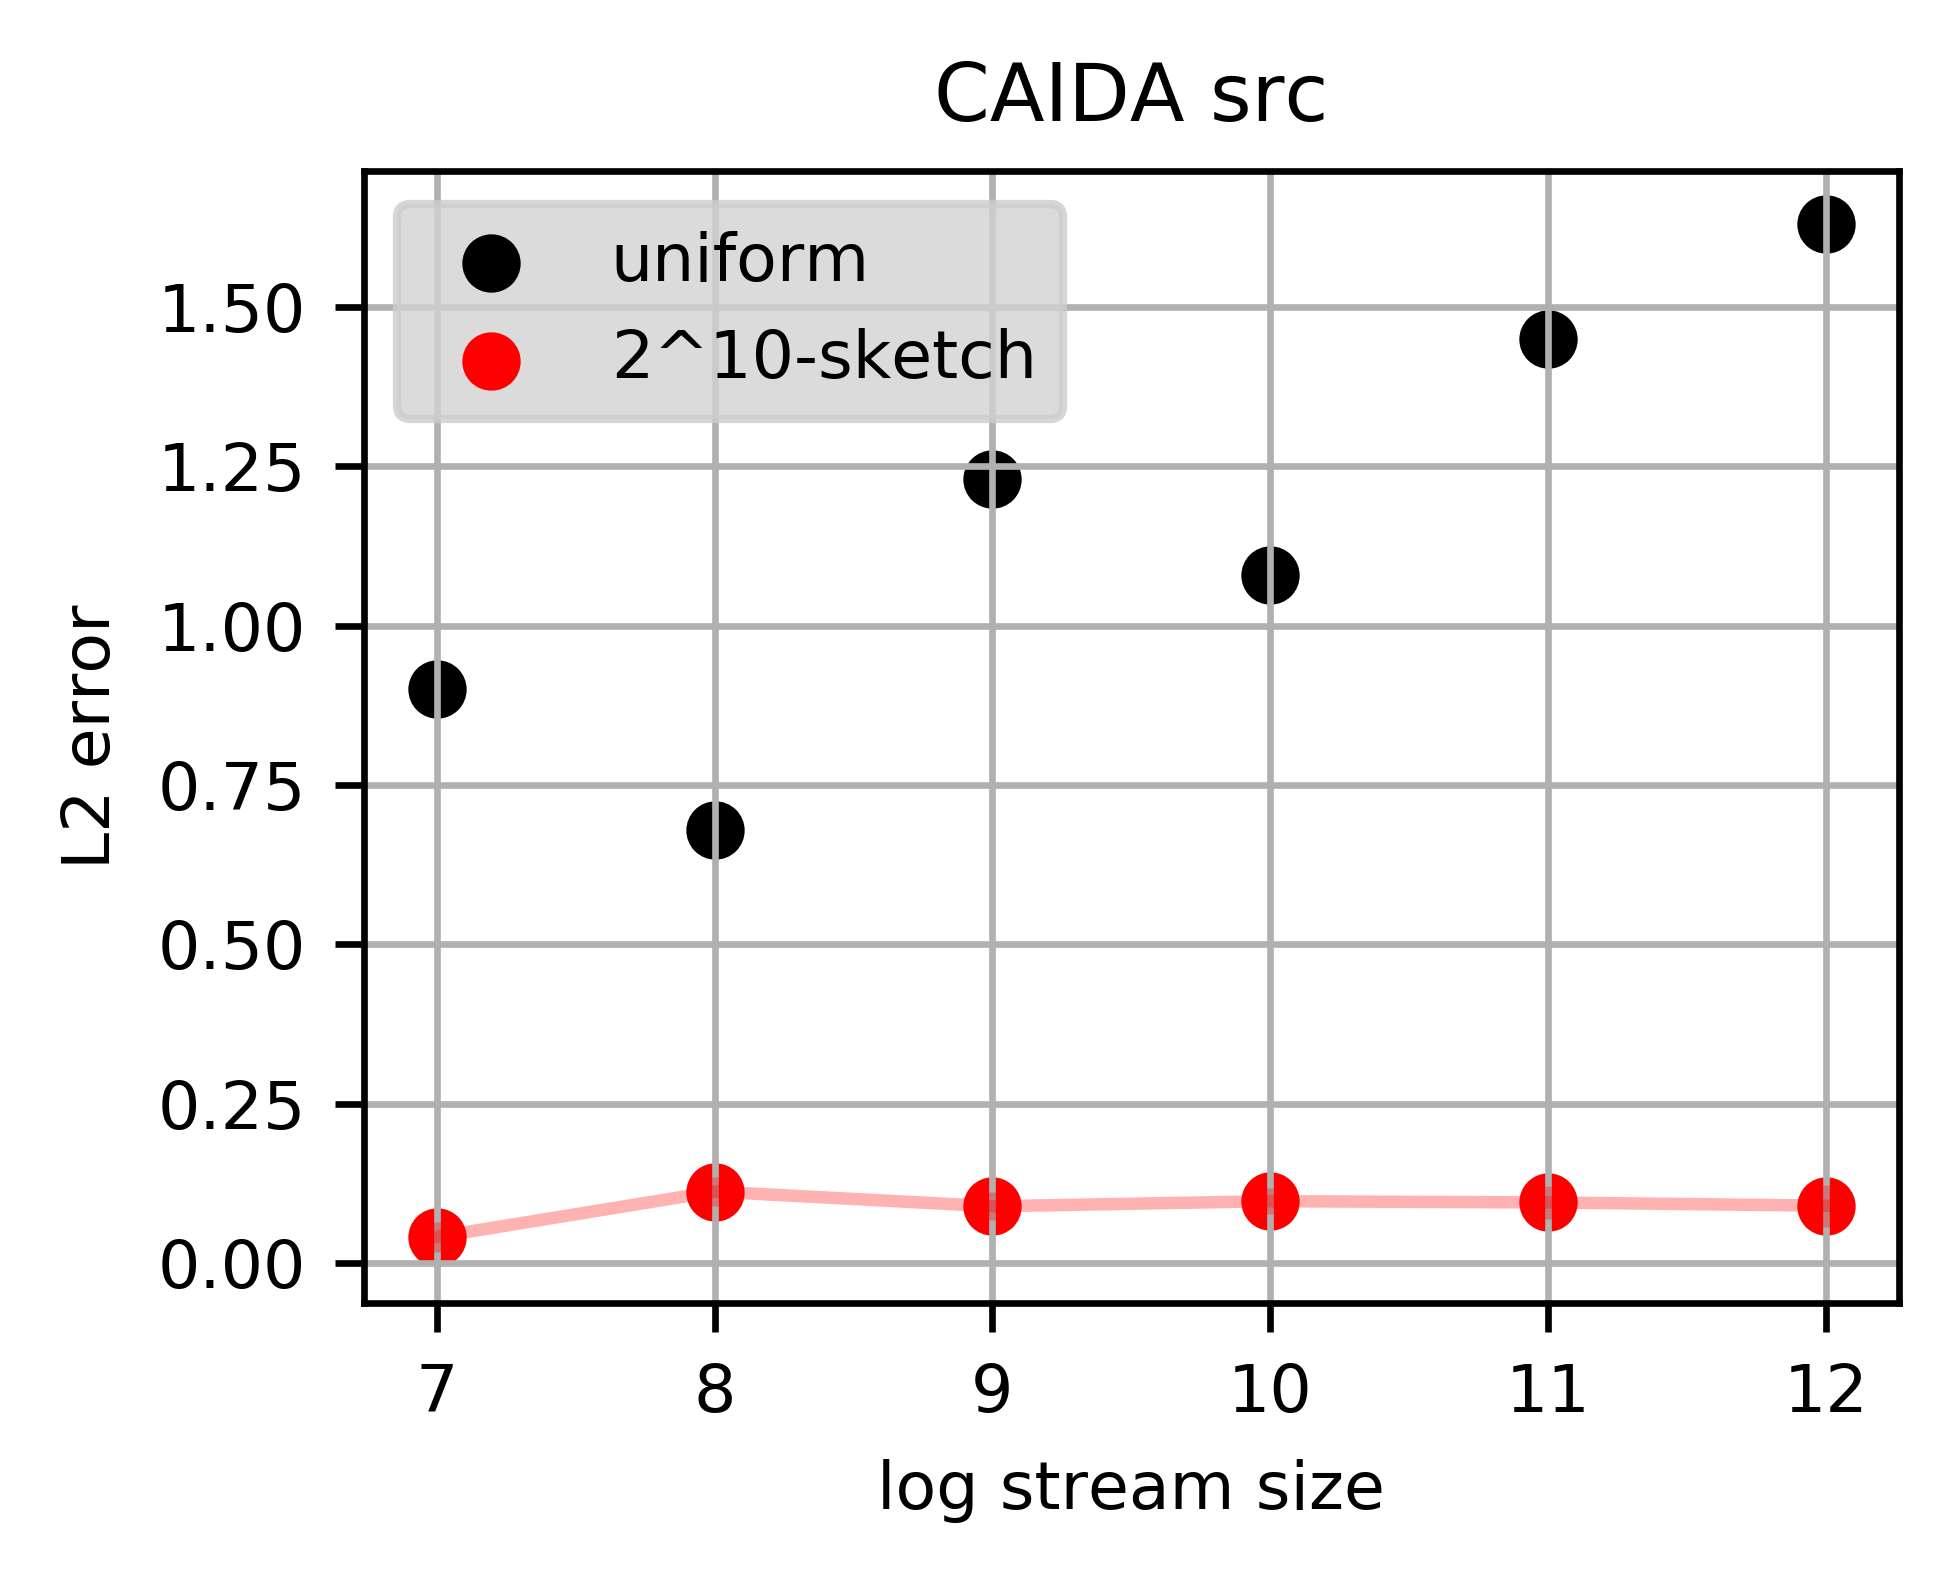

In [453]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out_rd_r8_L50/'
filename ='L2_src_mL_c128_r8_1015_08:12.csv'
out,ftr,normType = get_pd(DATADIR, filename, save=True,errbar=True,crVal=10)

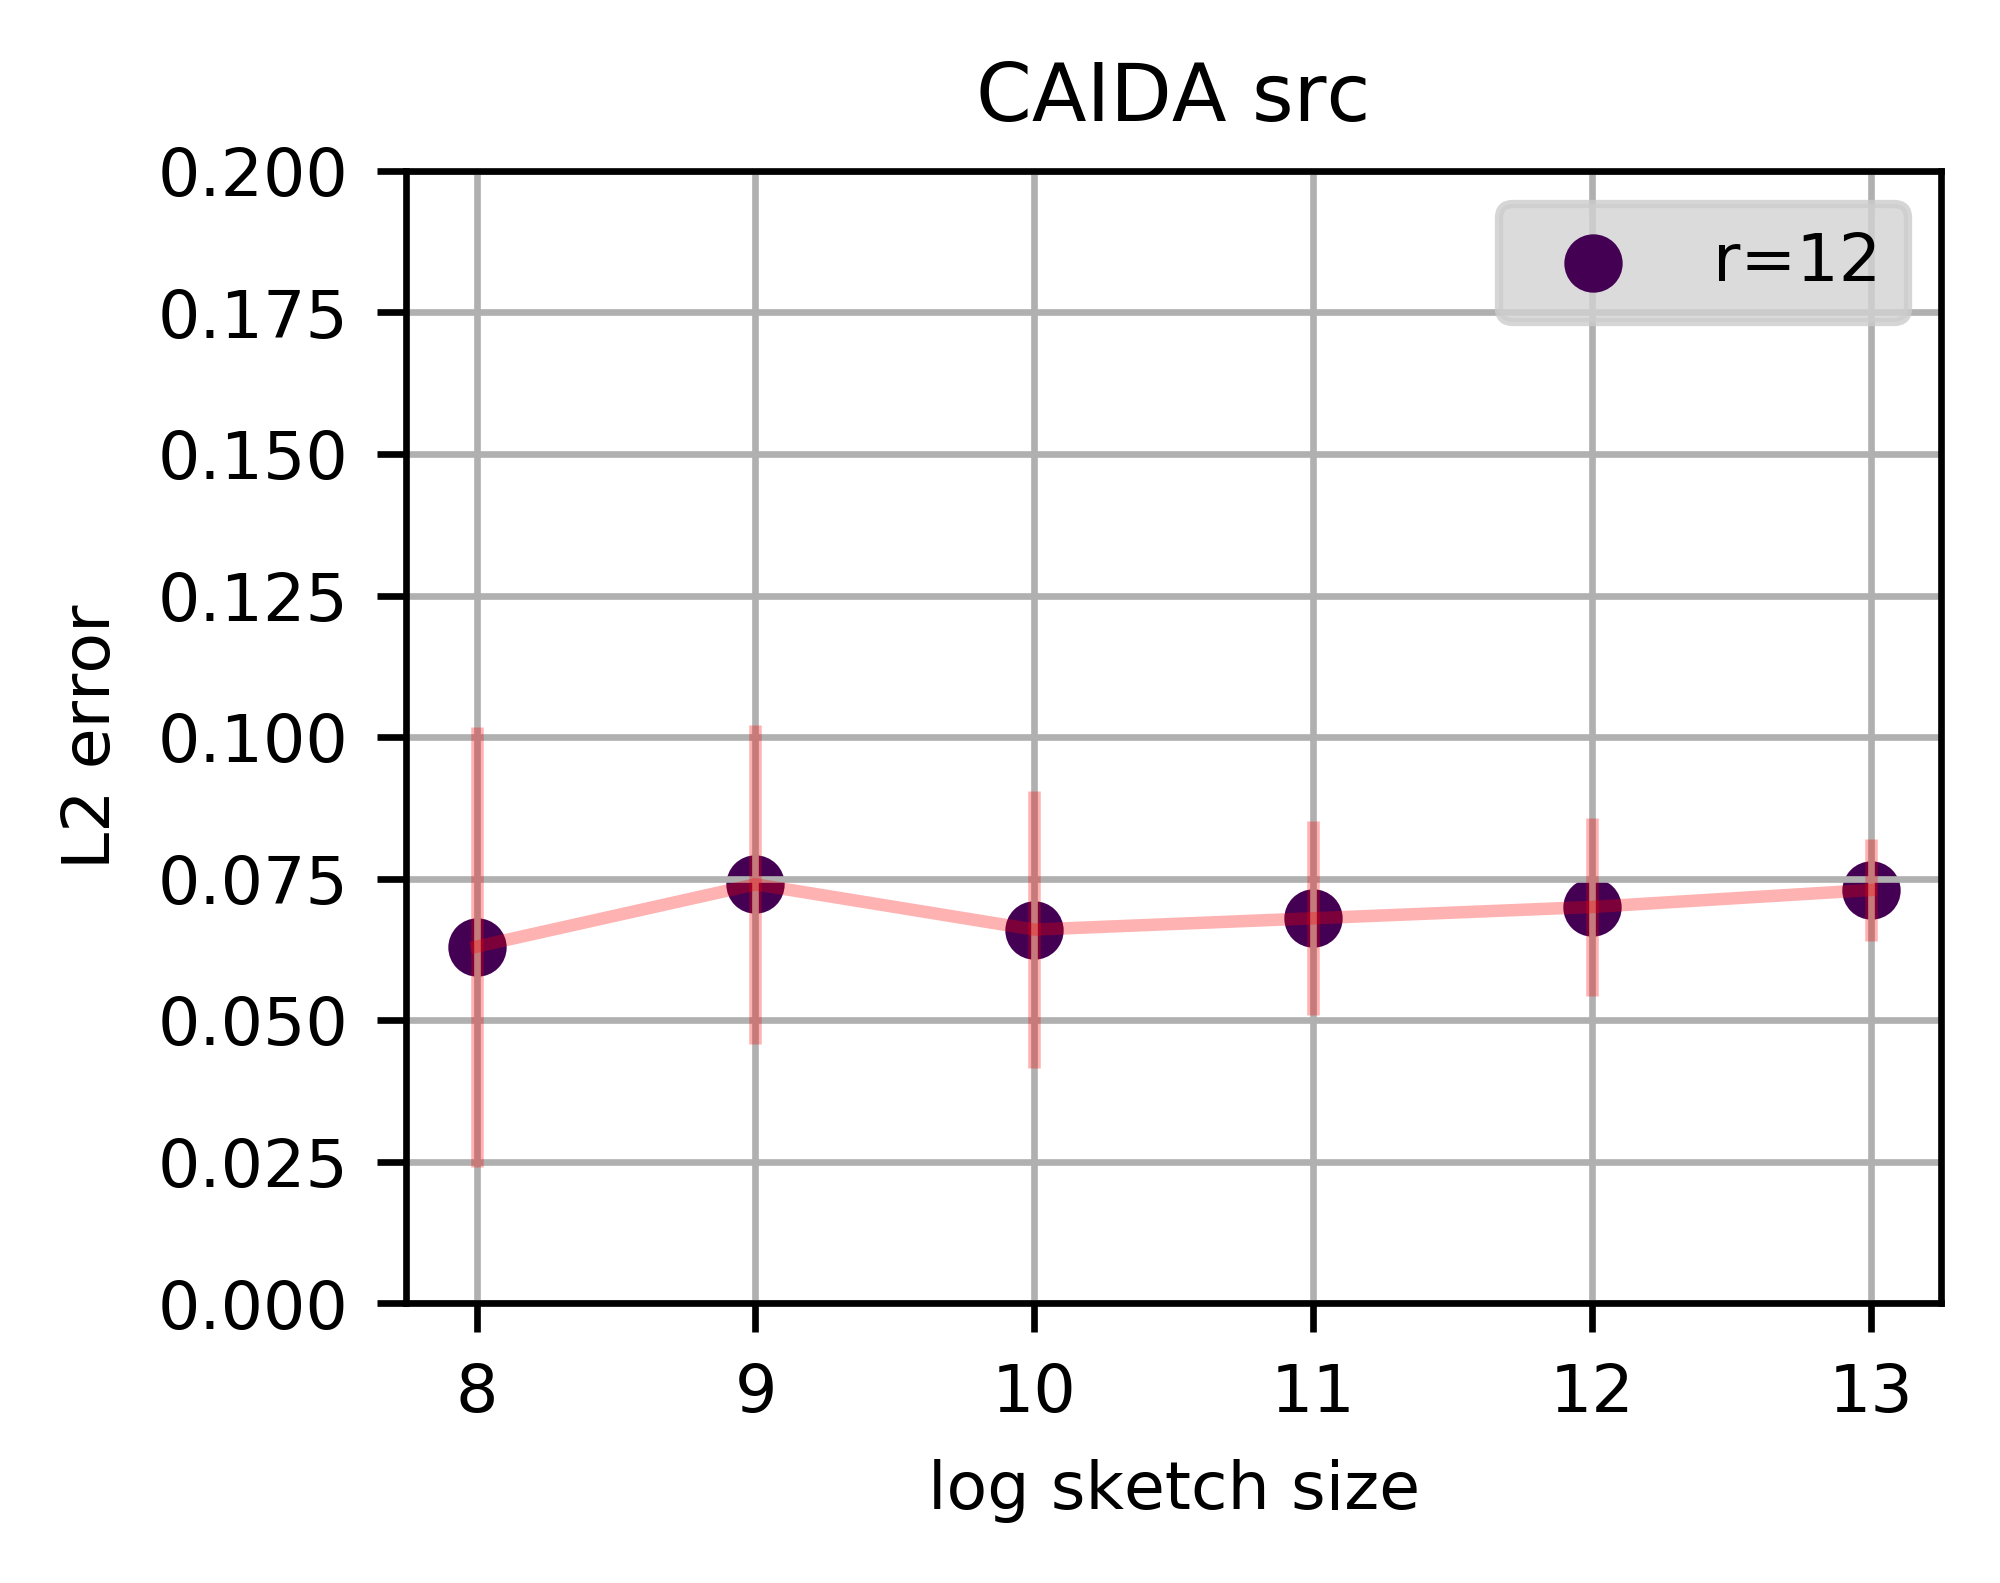

In [409]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out_src_r16/'
filename ='L2_src_csL_m8192_1015_01:50.csv'
out,ftr,normType = get_pd(DATADIR, filename, save=True,errbar=True)

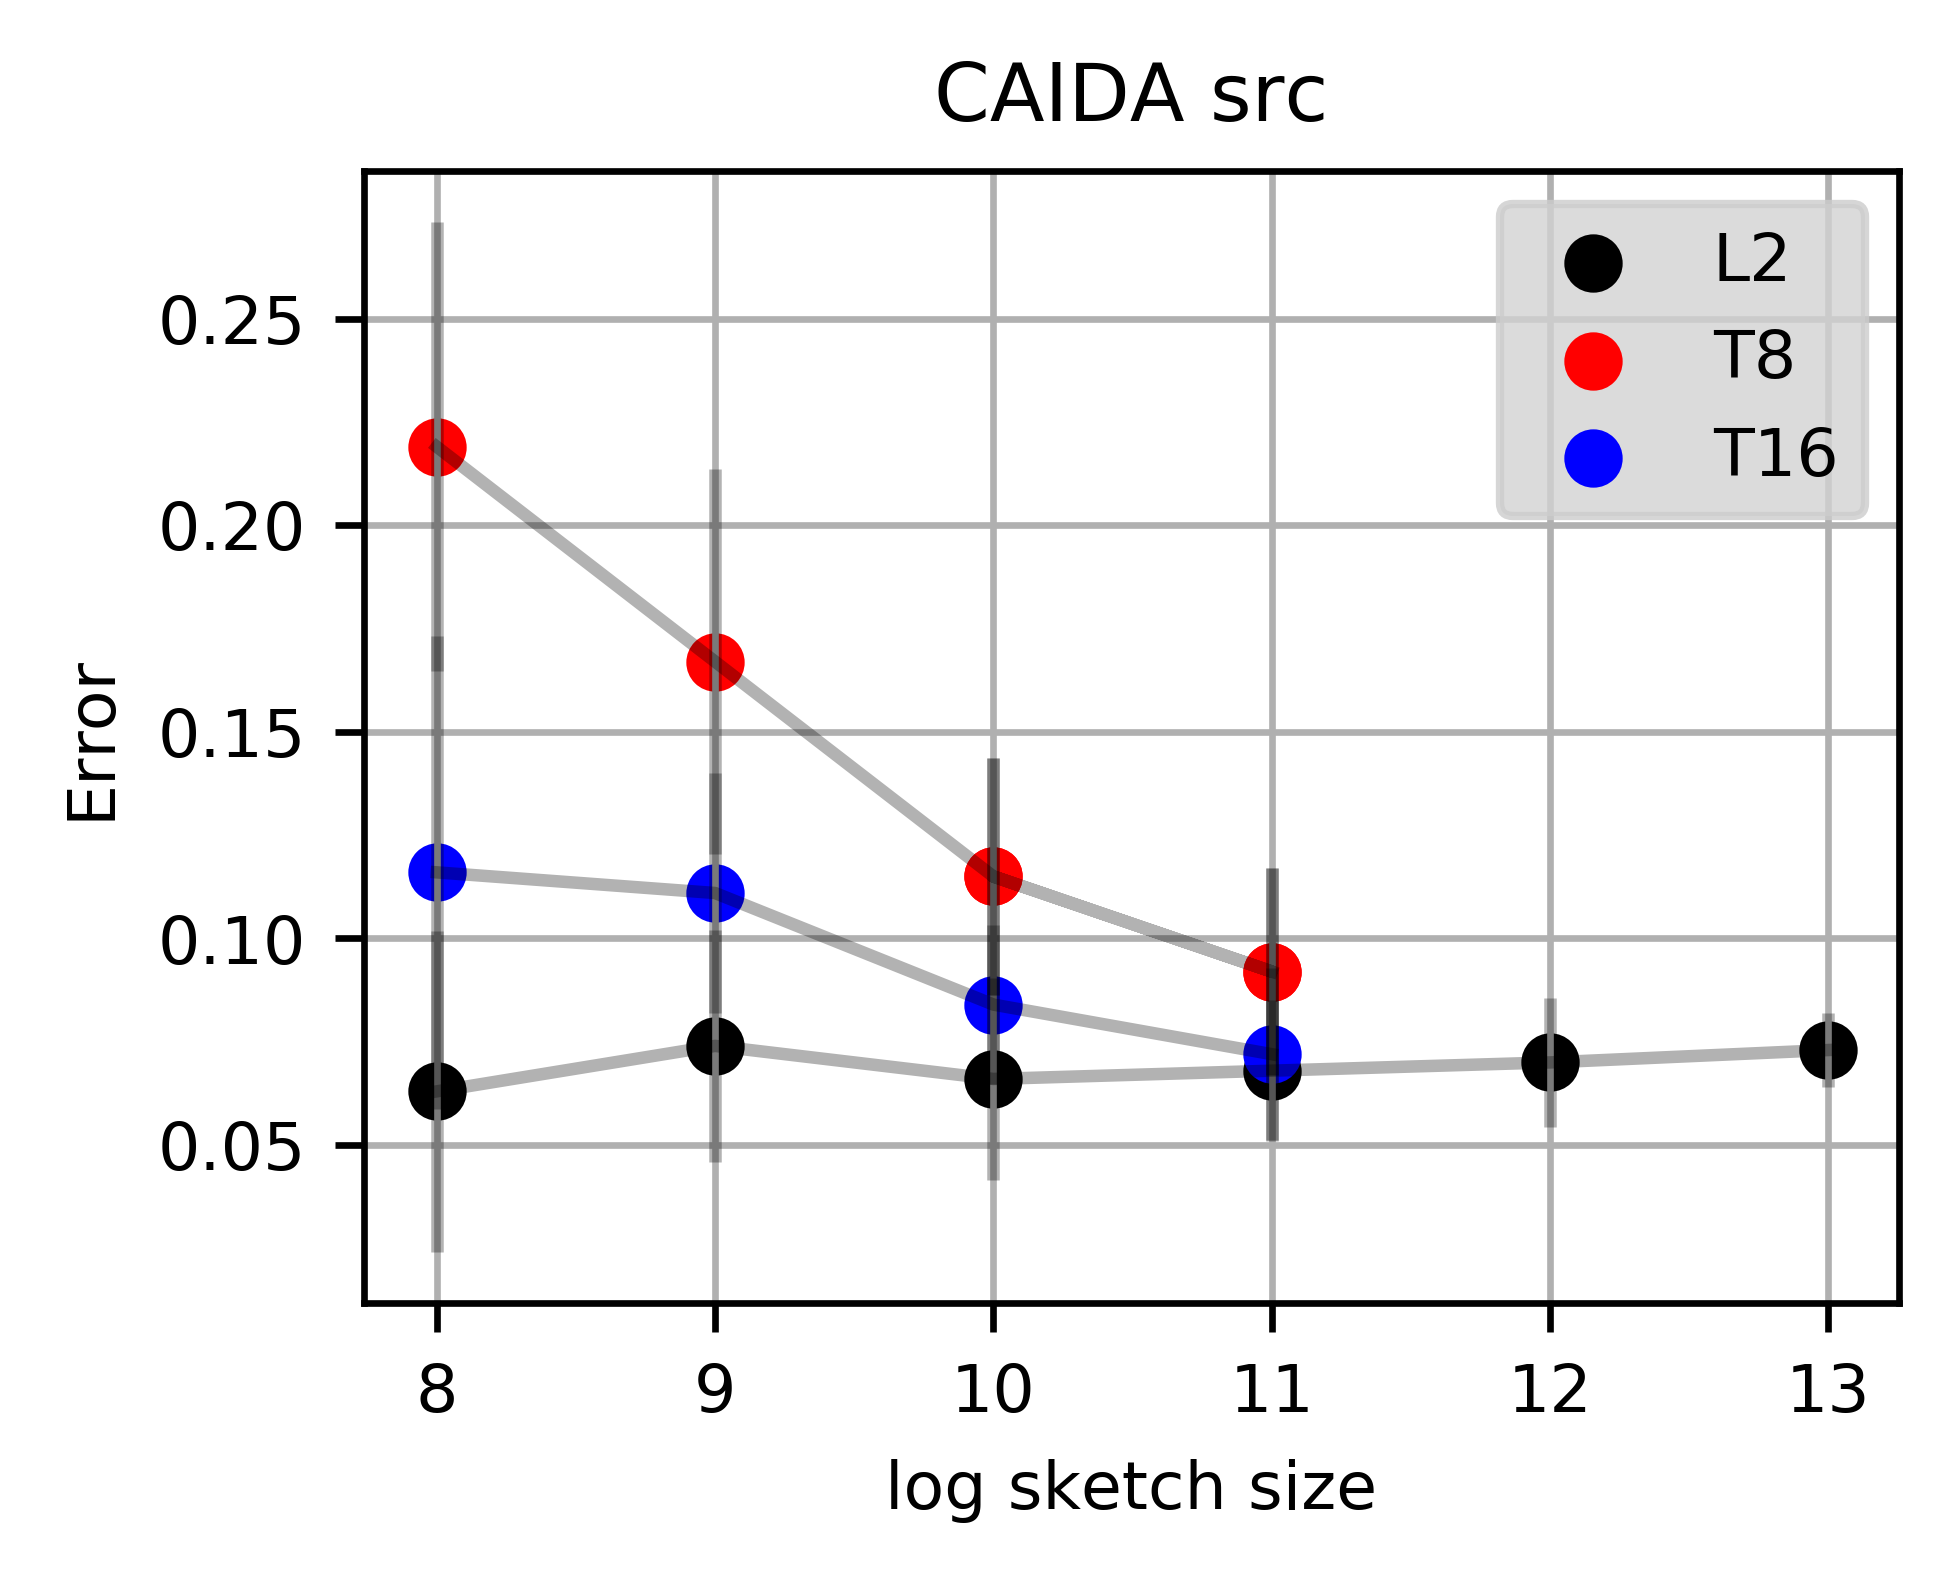

In [428]:
plot_csL(ftr, [out,T8_src_csL,T16_src_csL], [normType, 'T8','T16'], errbar=True)

In [425]:
colName=['errCs','n','m','w','c','r', 'cr', 'ex', 'cs','std','un','errUn']
outputs = [[0.219, 4294967296, 16384, 14745, 32, 12, 8, 1985, 2419.14, 107.819, 0, 0],
[0.167, 4294967296, 16384, 14745, 64, 12, 9, 1985, 2316.28, 92.294, 0, 0],
[0.115, 4294967296, 16384, 14745, 128, 12, 10, 1985, 2214.243, 57.053, 0, 0],
[0.092, 4294967296, 16384, 14745, 256, 12, 11, 1985, 2166.907, 49.857, 0, 0],
[0.115, 4294967296, 16384, 14745, 128, 12, 10, 1985, 2214.243, 57.053, 0, 0],
[0.092, 4294967296, 16384, 14745, 256, 12, 11, 1985, 2166.907, 49.857, 0, 0]]
T8_src_csL = pd.DataFrame(data = outputs, columns = colName)
outputs2 = [[0.116, 4294967296, 16384, 14745, 32, 12, 8, 3110, 3469.653, 177.779, 0, 0],
            [0.111, 4294967296, 16384, 14745, 64, 12, 9, 3110, 3454.448, 90.026, 0, 0],
            [0.084, 4294967296, 16384, 14745, 128, 12, 10, 3110, 3370.987, 60.083, 0, 0],
            [0.072, 4294967296, 16384, 14745, 256, 12, 11, 3110, 3335.397, 64.896, 0, 0]]

T16_src_csL = pd.DataFrame(data = outputs2, columns = colName)
# resultPd.to_csv(f'{outDir}{outName}.csv', index = False)

In [427]:
def plot_csL(ftr, outs, normTypes, errbar=True,save=True):
    for ii, out in enumerate(outs):
        outR = out
        plt.scatter(outR['cr'], outR['errCs'],label=f'{normTypes[ii]}')
        if errbar: plt.errorbar(outR['cr'], outR['errCs'], outR['std']/outR['ex'], c='k',alpha=0.3)
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel(f'Error')
    plt.xlabel('log sketch size')
#     plt.ylim(0,0.2)
    plt.title(f'CAIDA {ftr}')
    if save: plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_csLoop.png',bbox_inches = 'tight')
    

In [ ]:
def plot_csL_error(out, ftr, normType, errbar=False):
    rList = out['r'].unique()
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        

In [ ]:
out_src_r16/L2_src_csL_m8192_1015_01:49.csv

(   errCs           n    m    w    c  r  cr      ex      cs    std  un  errUn
 0  0.019  4294967296  128  115    8  8   6  19.925  19.552  1.319   0      0
 1  0.048  4294967296  128  115   16  8   7  19.925  20.875  1.322   0      0
 2  0.032  4294967296  128  115   32  8   8  19.925  20.567  0.764   0      0
 3  0.035  4294967296  128  115   64  8   9  19.925  20.627  0.627   0      0
 4  0.033  4294967296  128  115  128  8  10  19.925  20.575  0.444   0      0,
 'src',
 'L2')

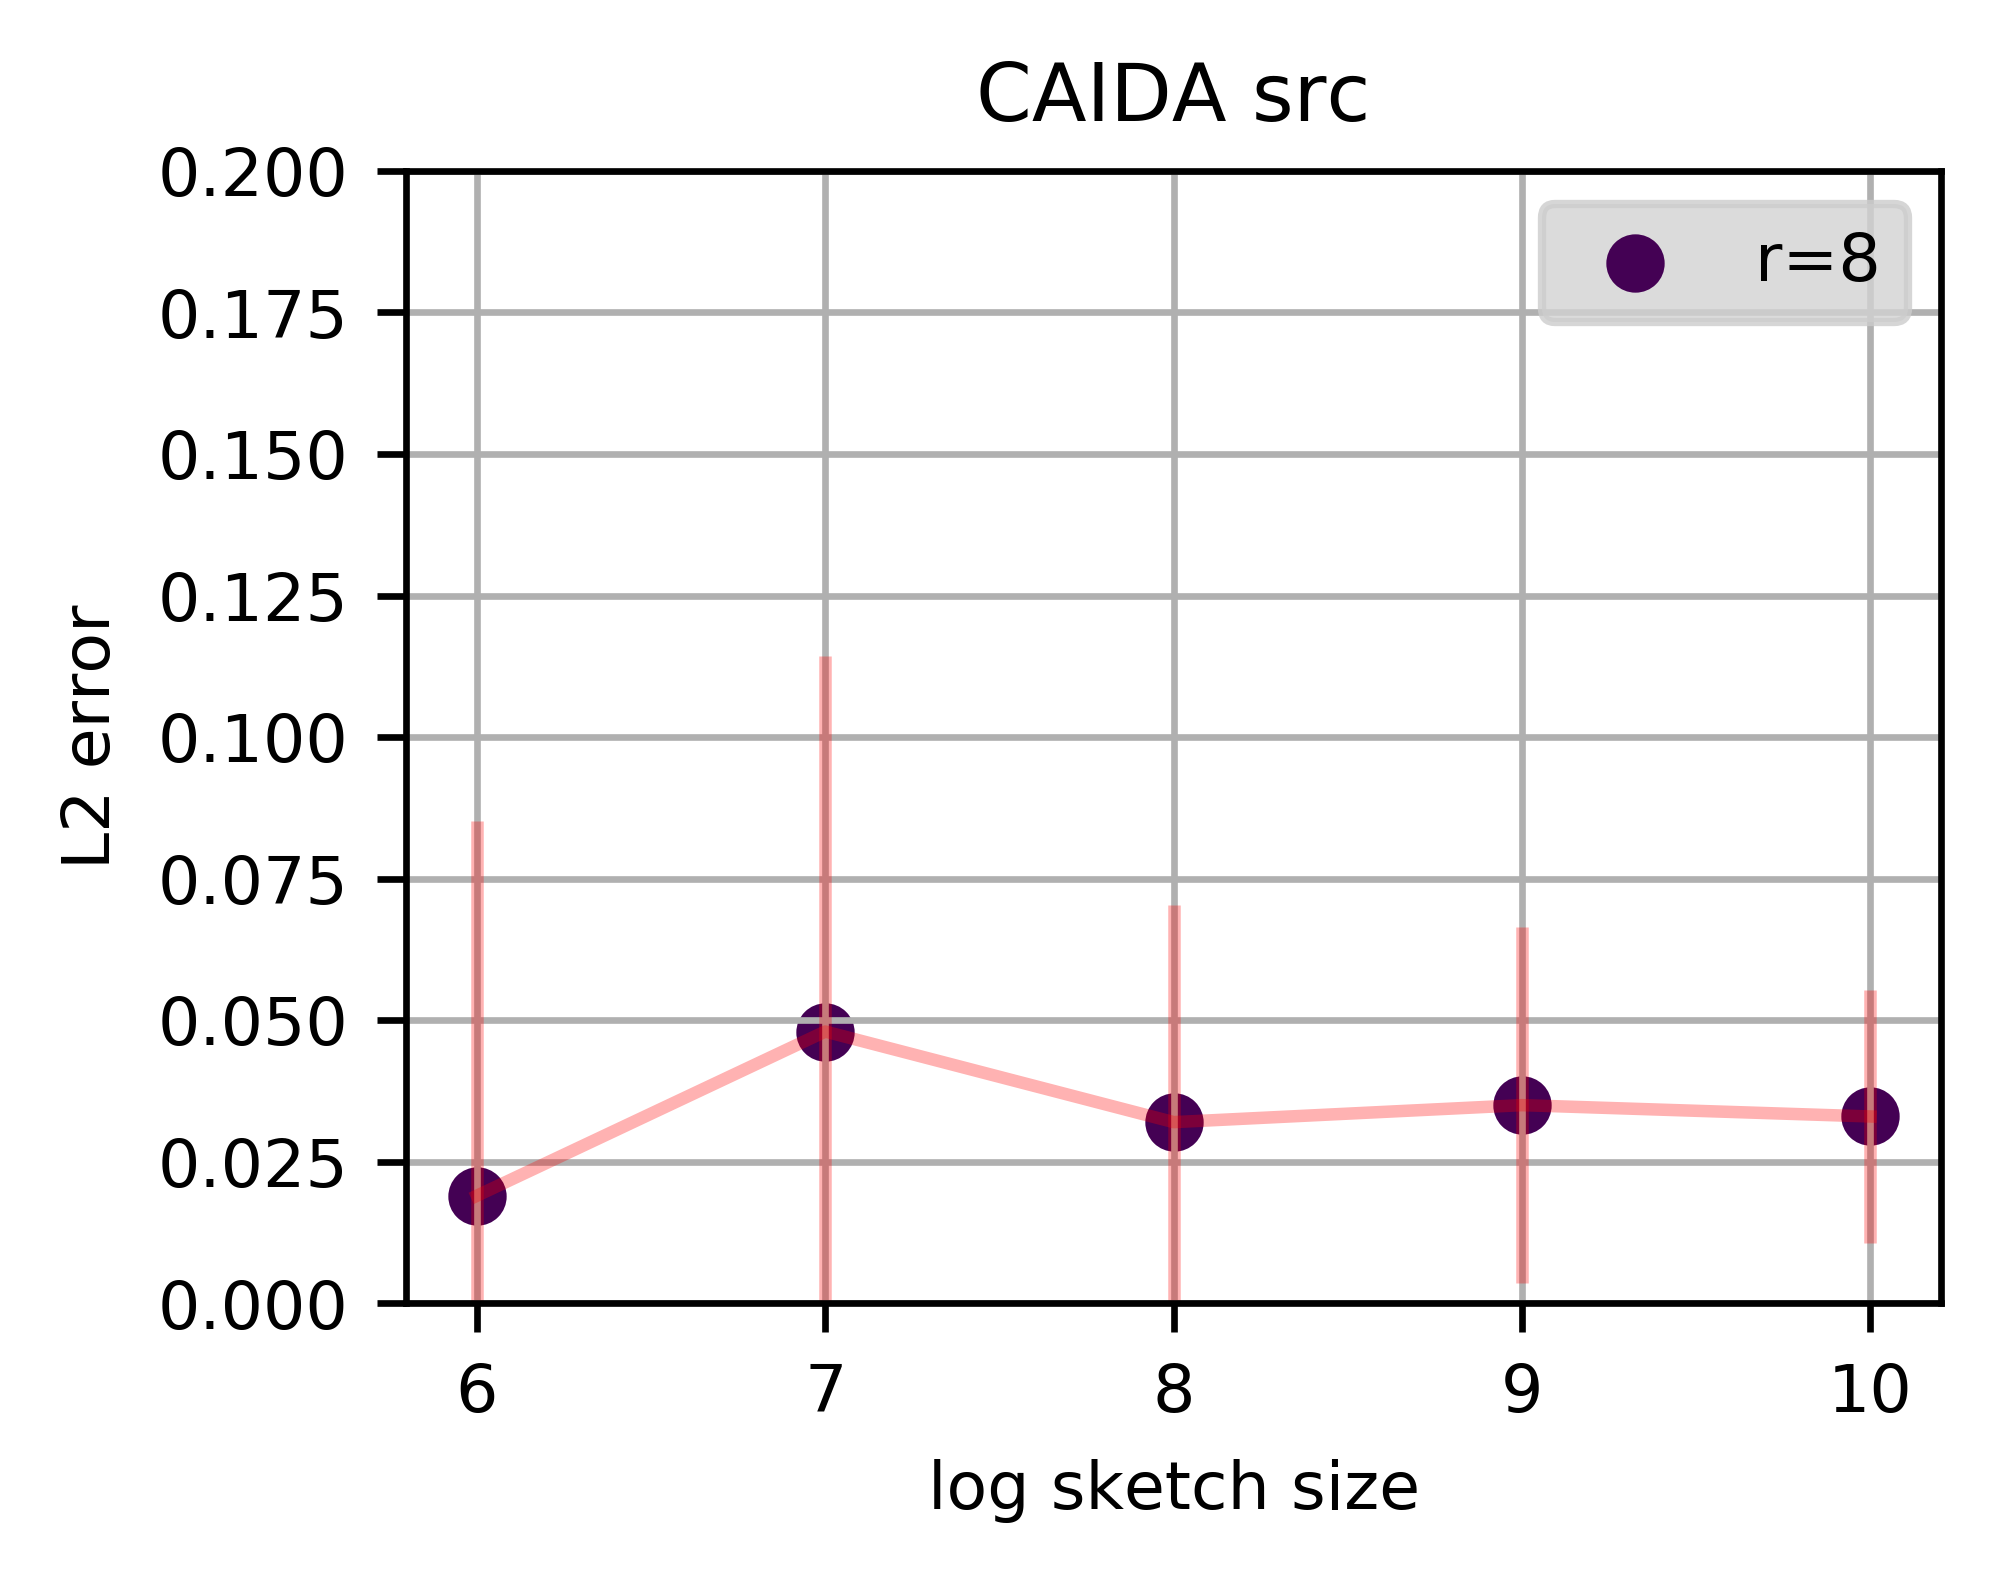

In [433]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out_rd_r8/'
filename ='L2_src_csL_m128_1015_01:18.csv'
get_pd(DATADIR, filename, save=True,errbar=True)

In [436]:
folder = 'out_src_r16'
get_folder_plots(folder,save=True,crVal=10,errbar=True)

TypeError: get_folder_plots() got an unexpected keyword argument 'errbar'

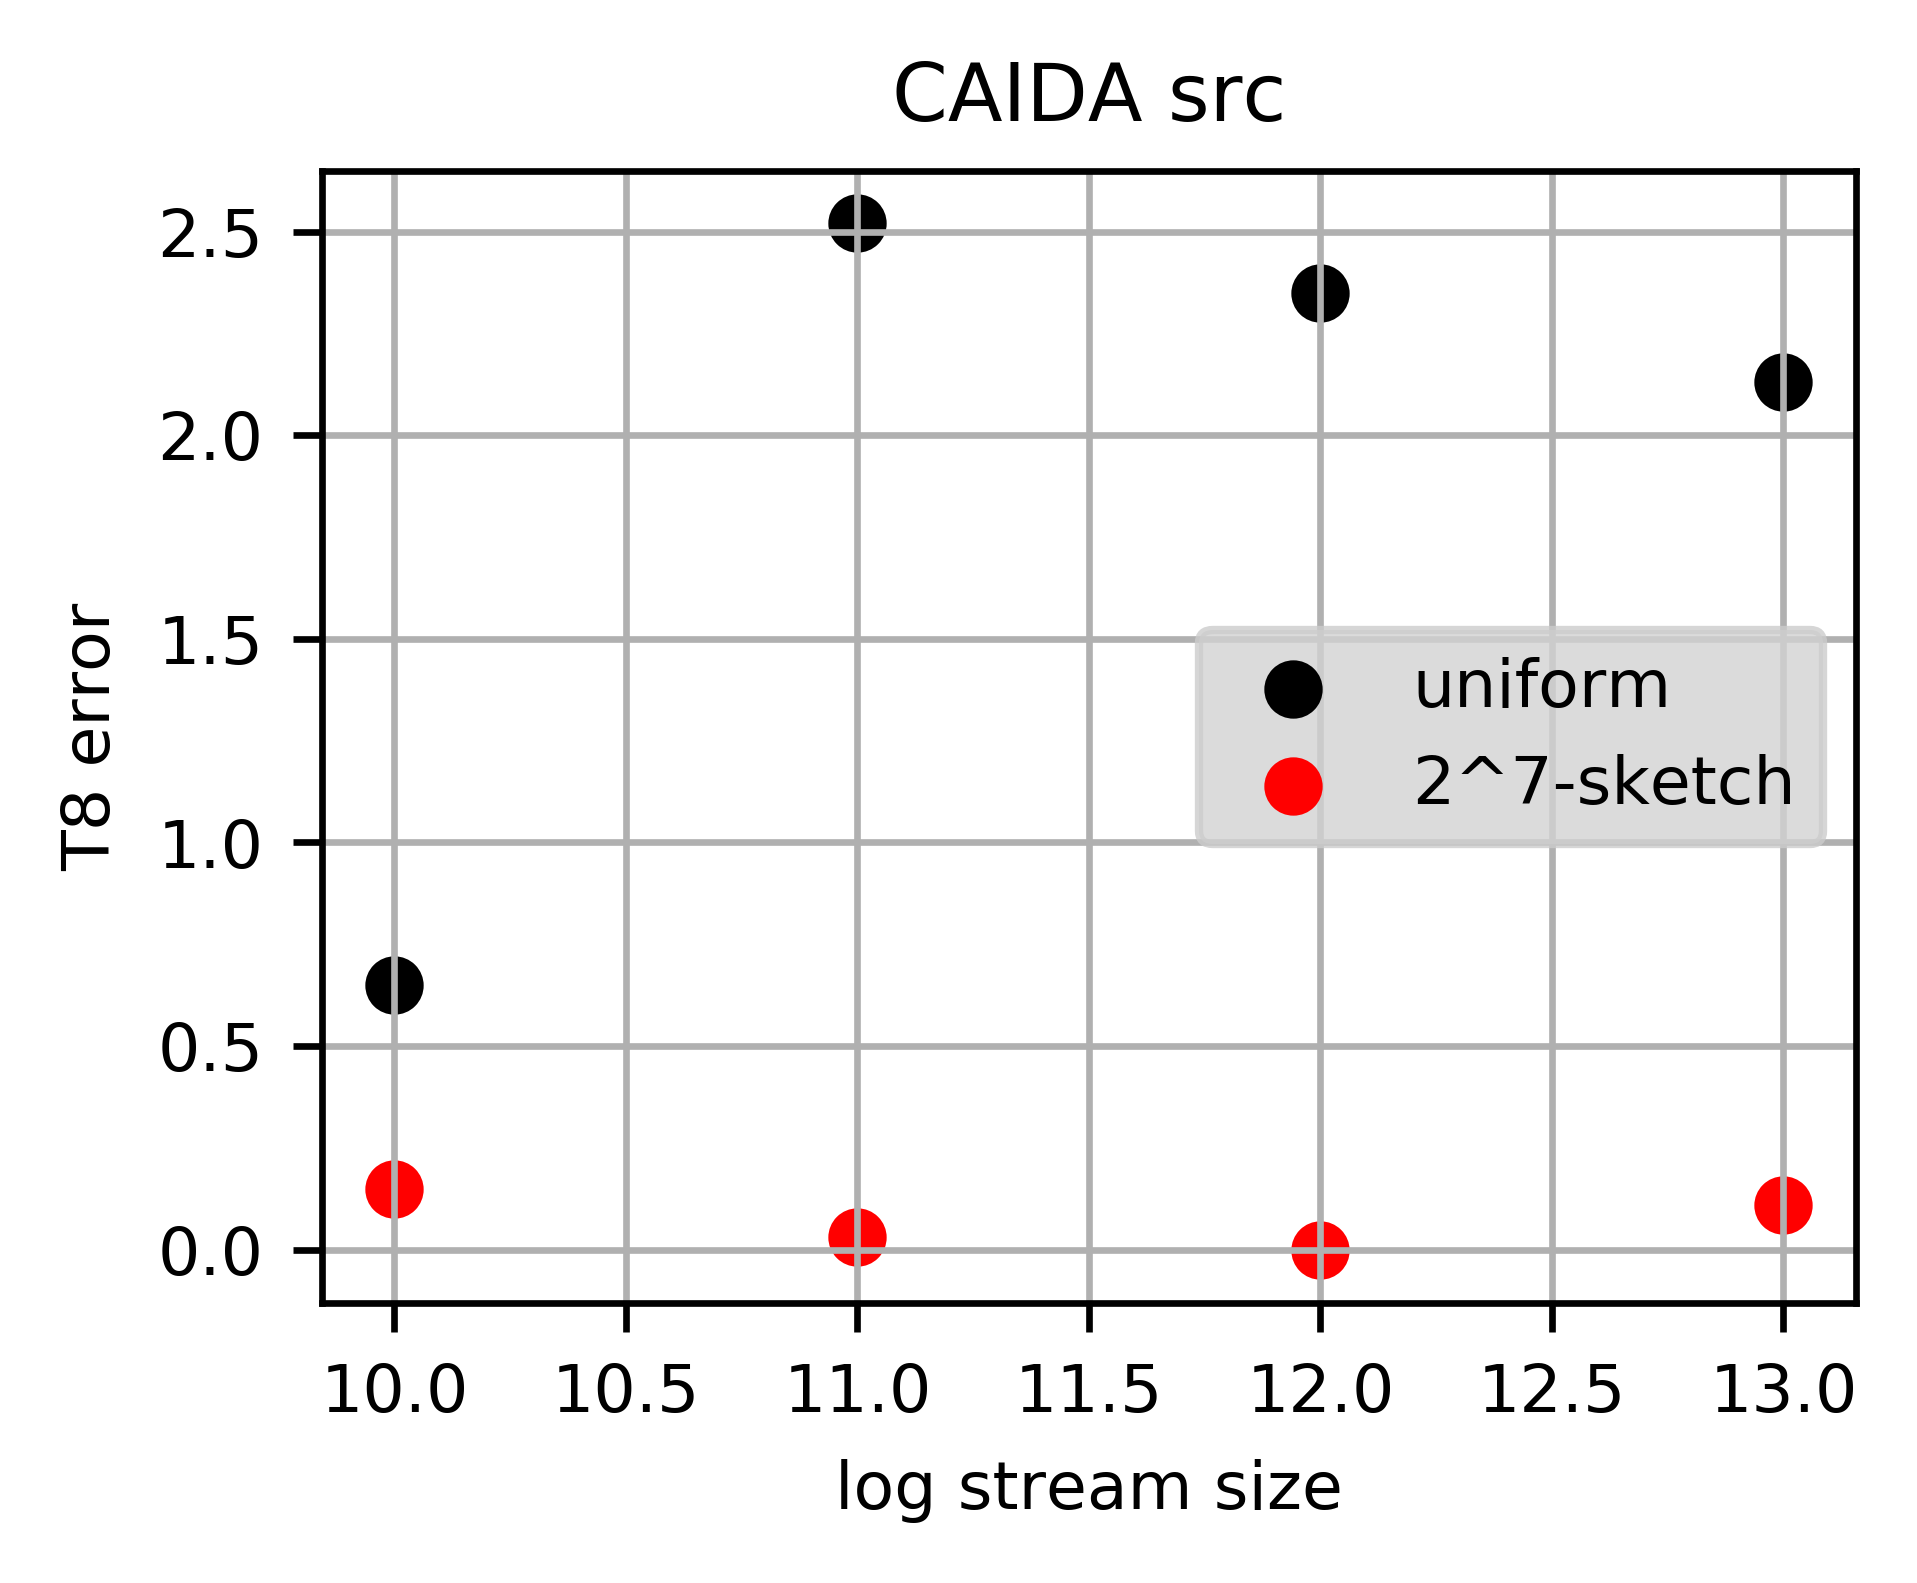

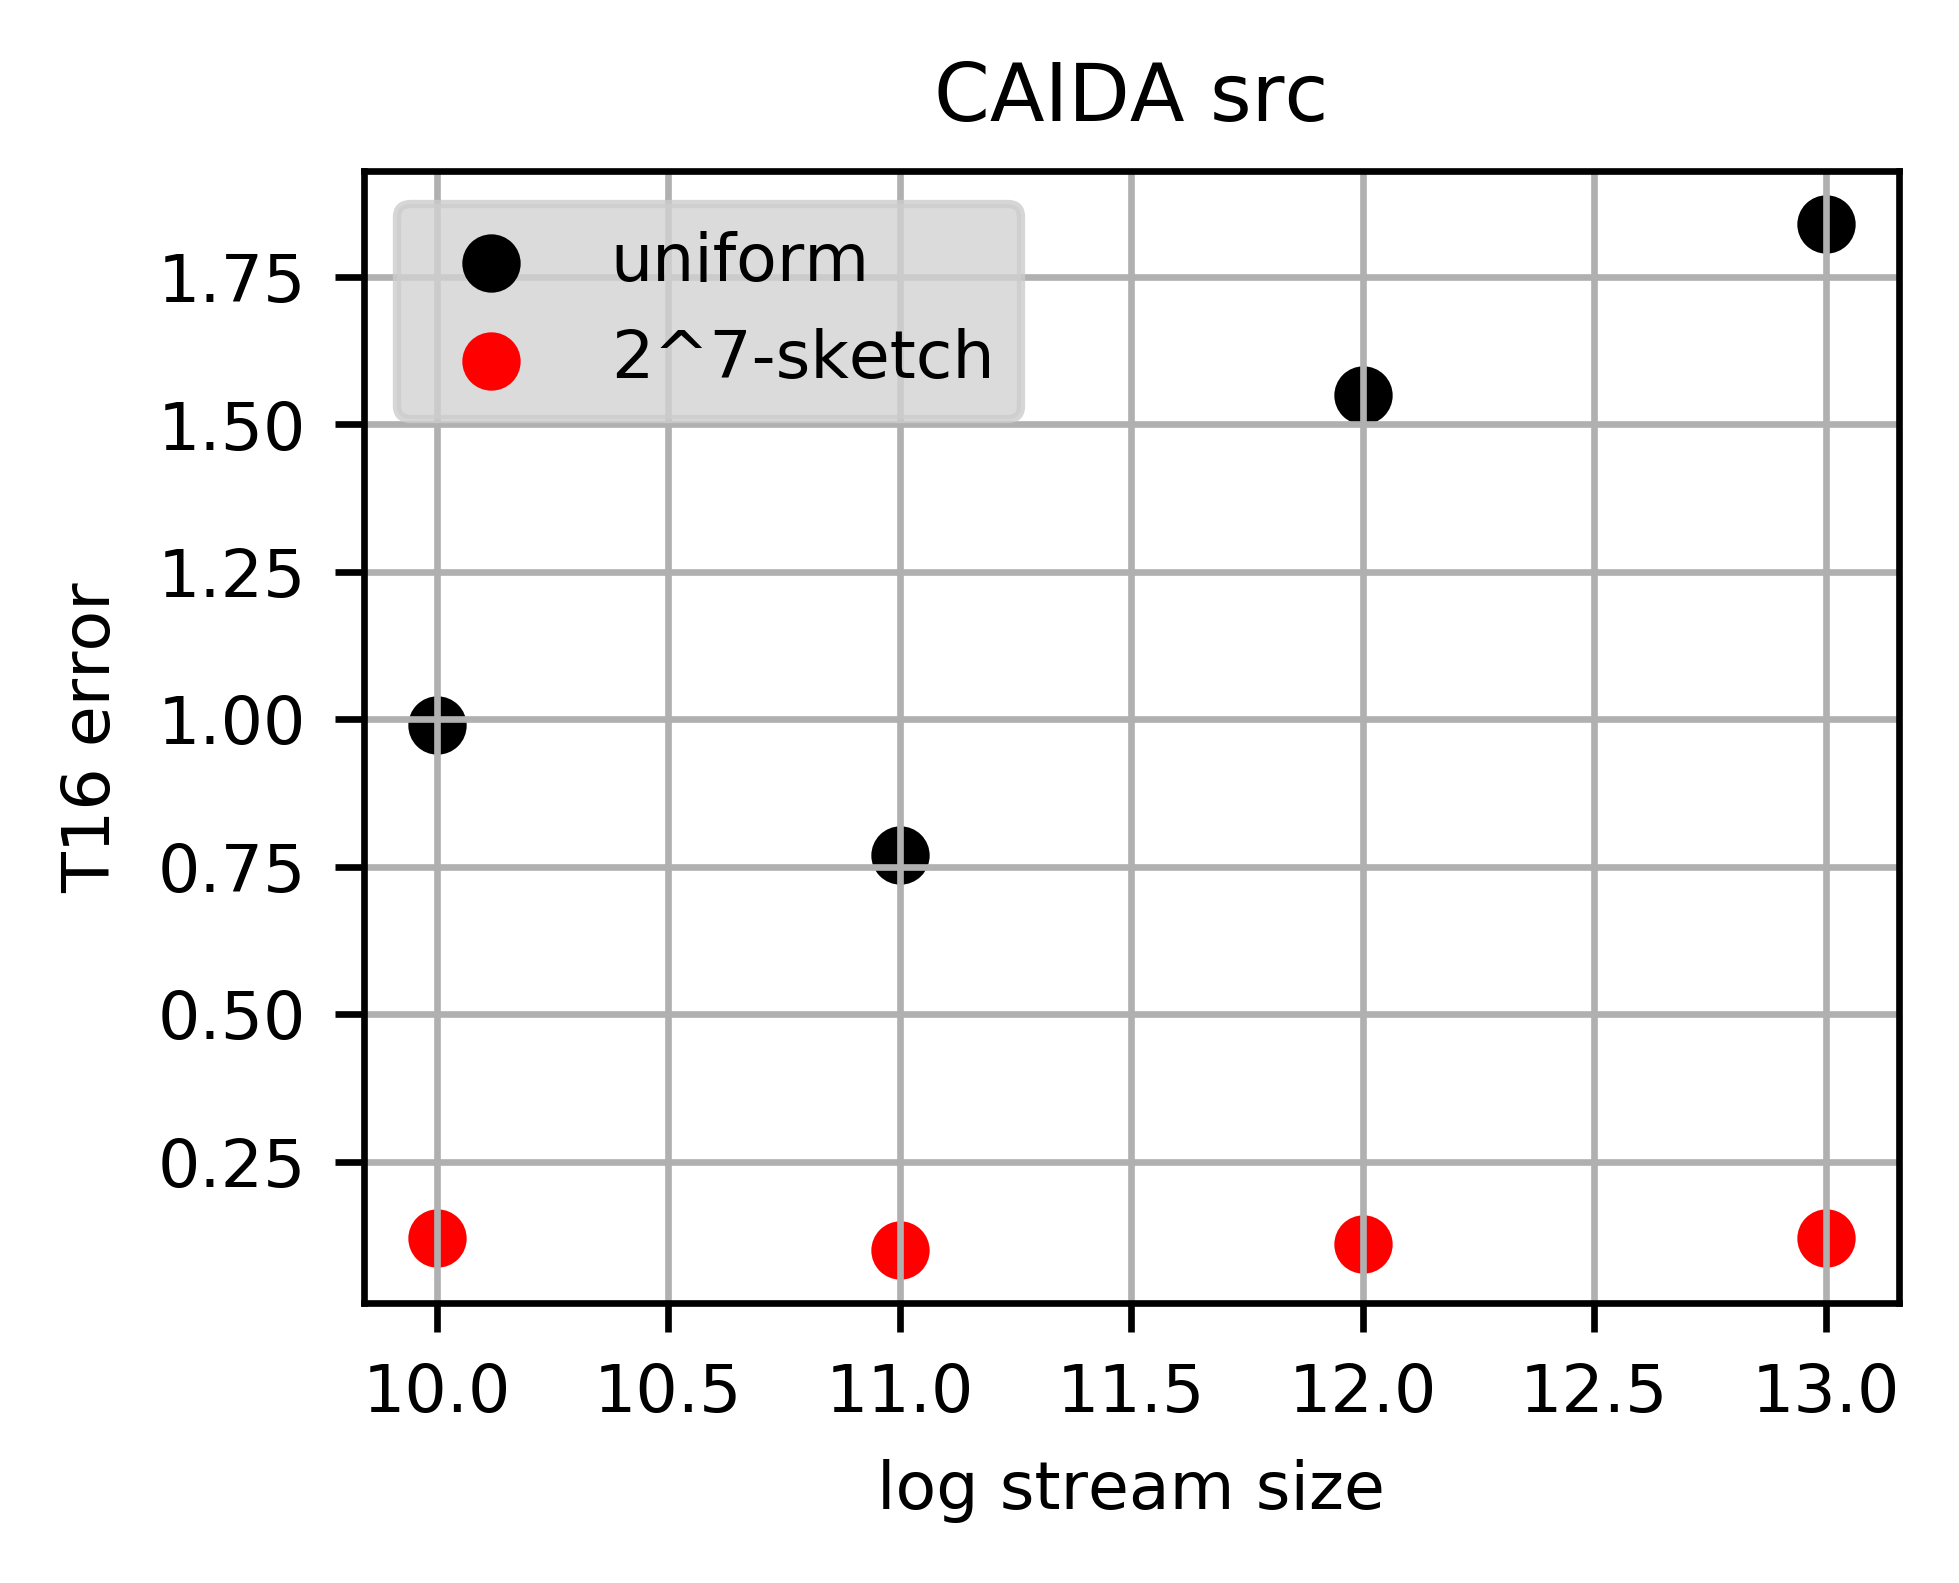

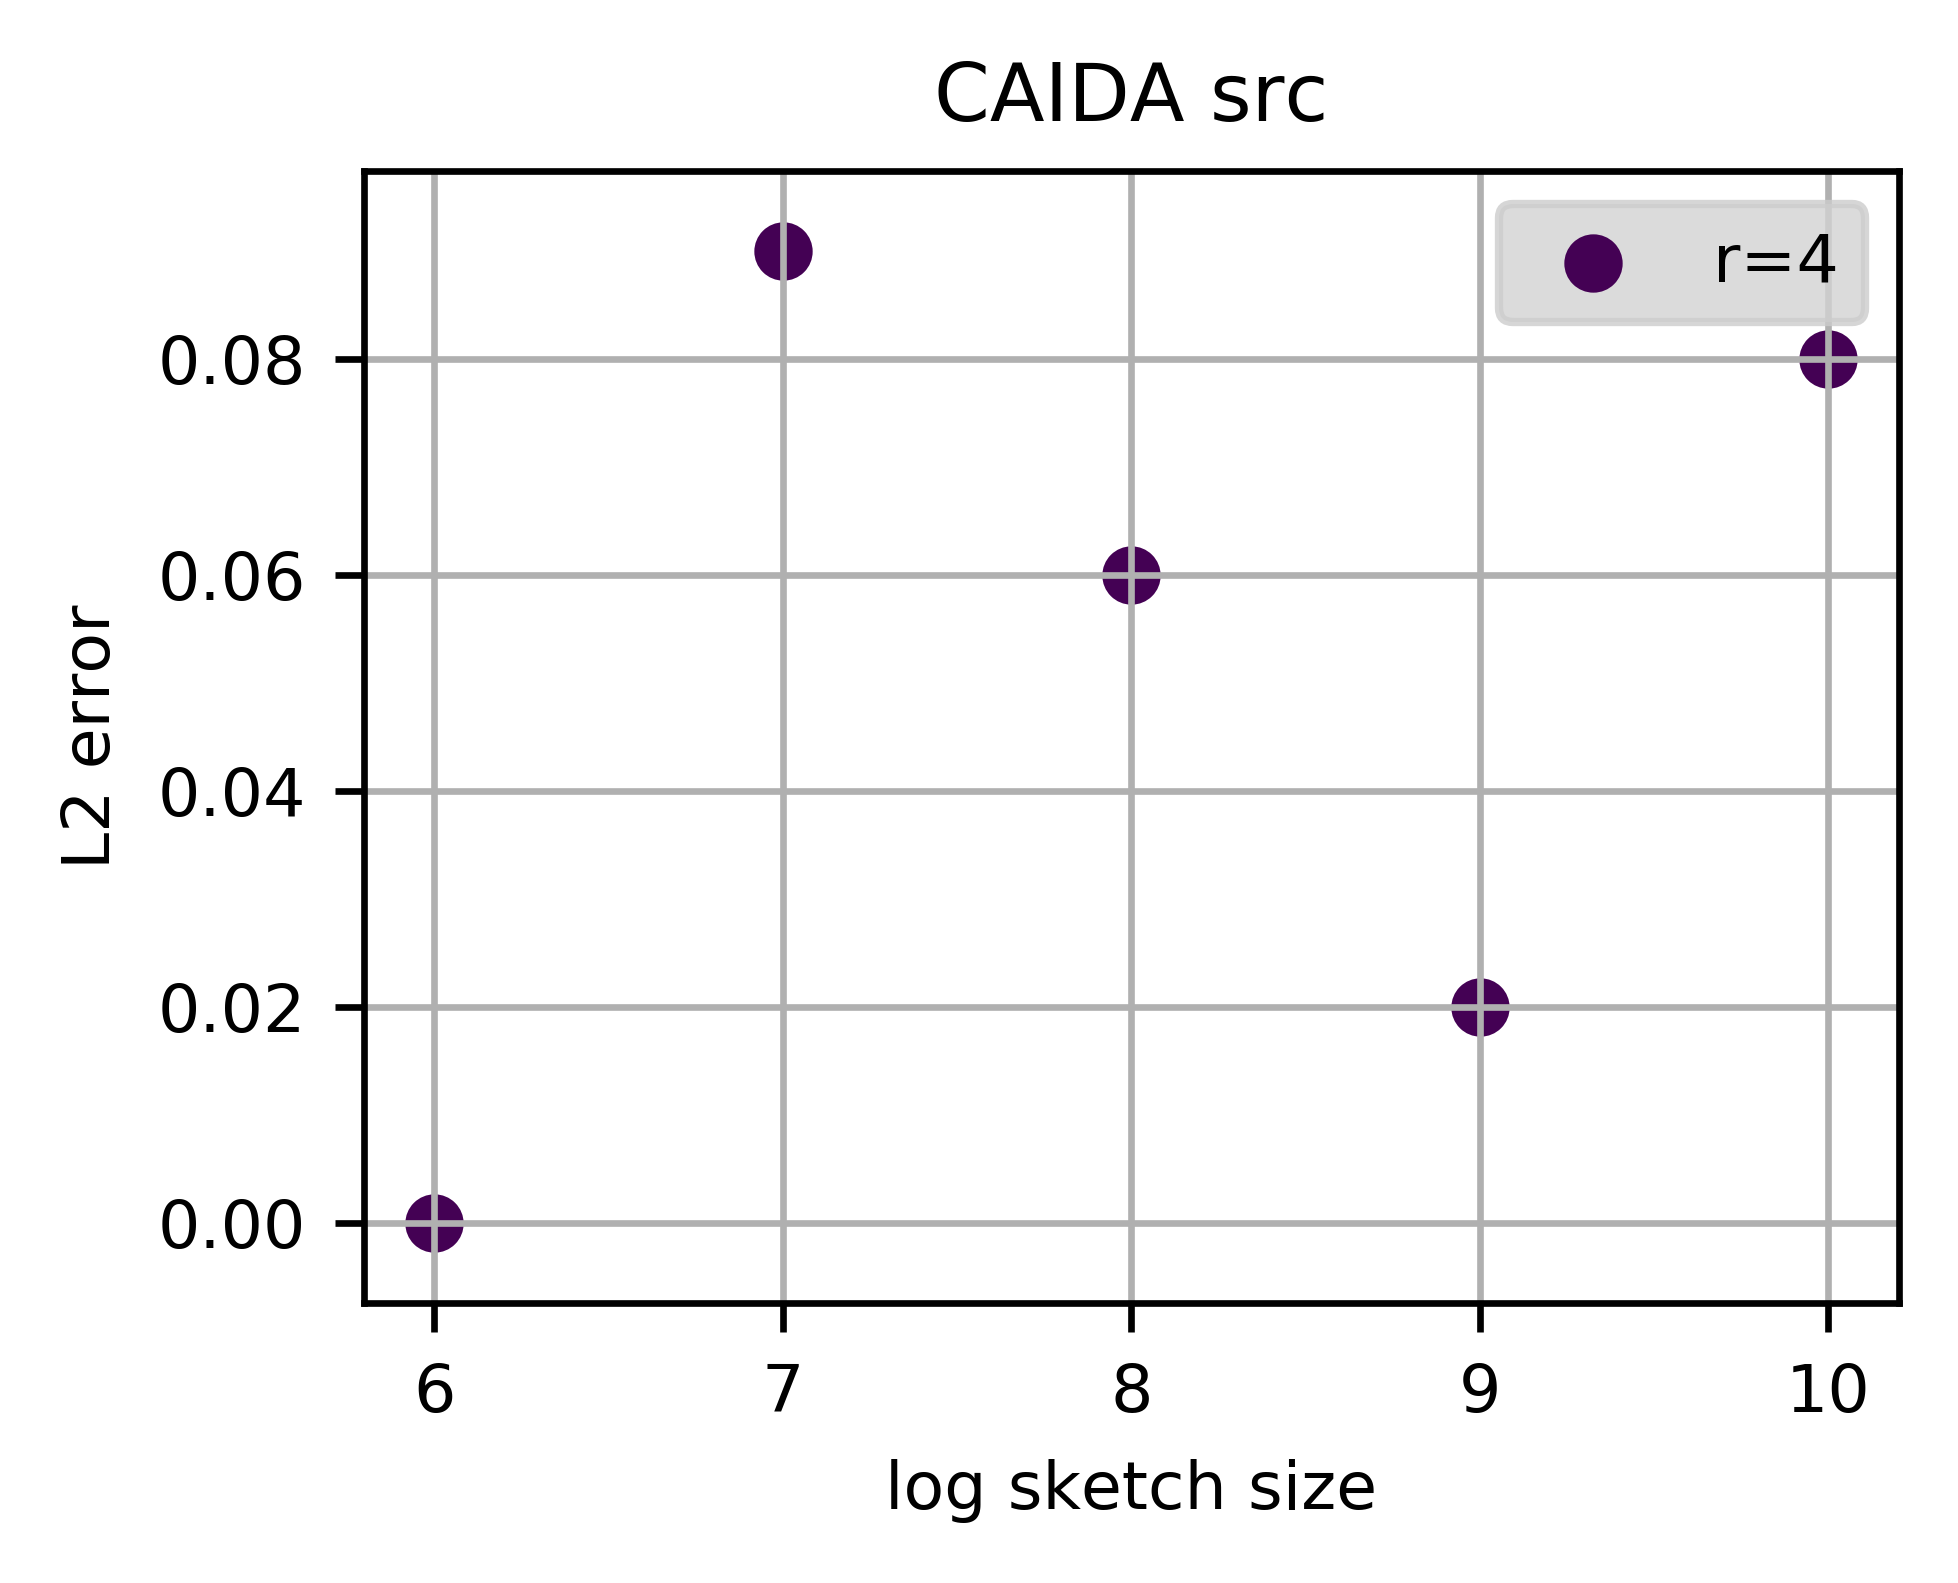

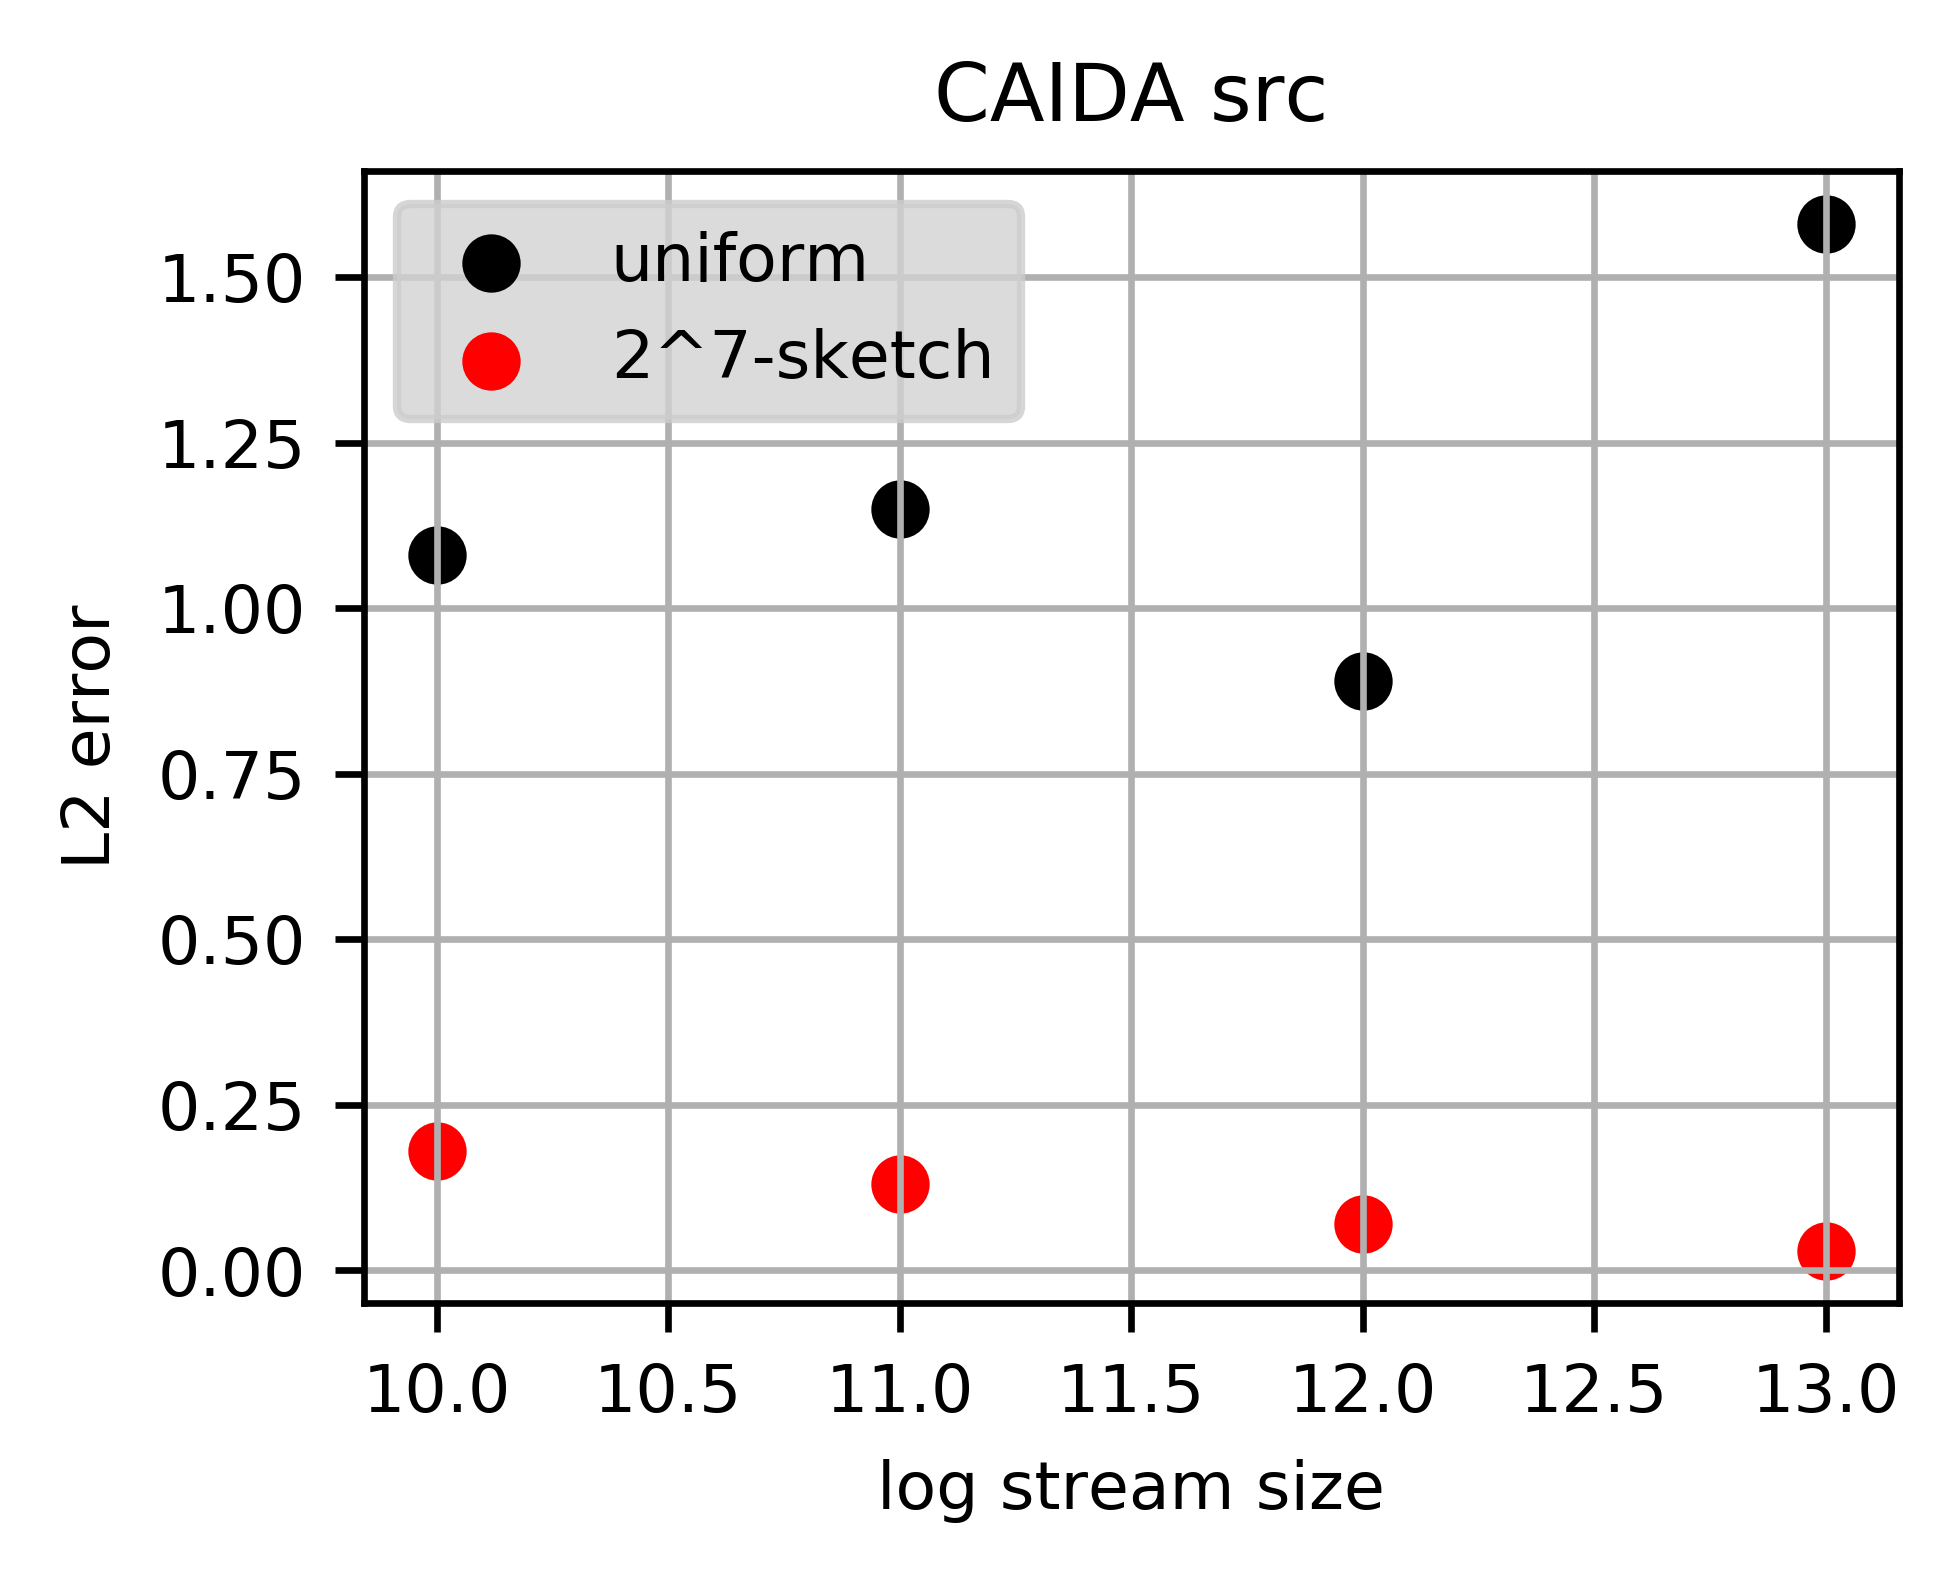

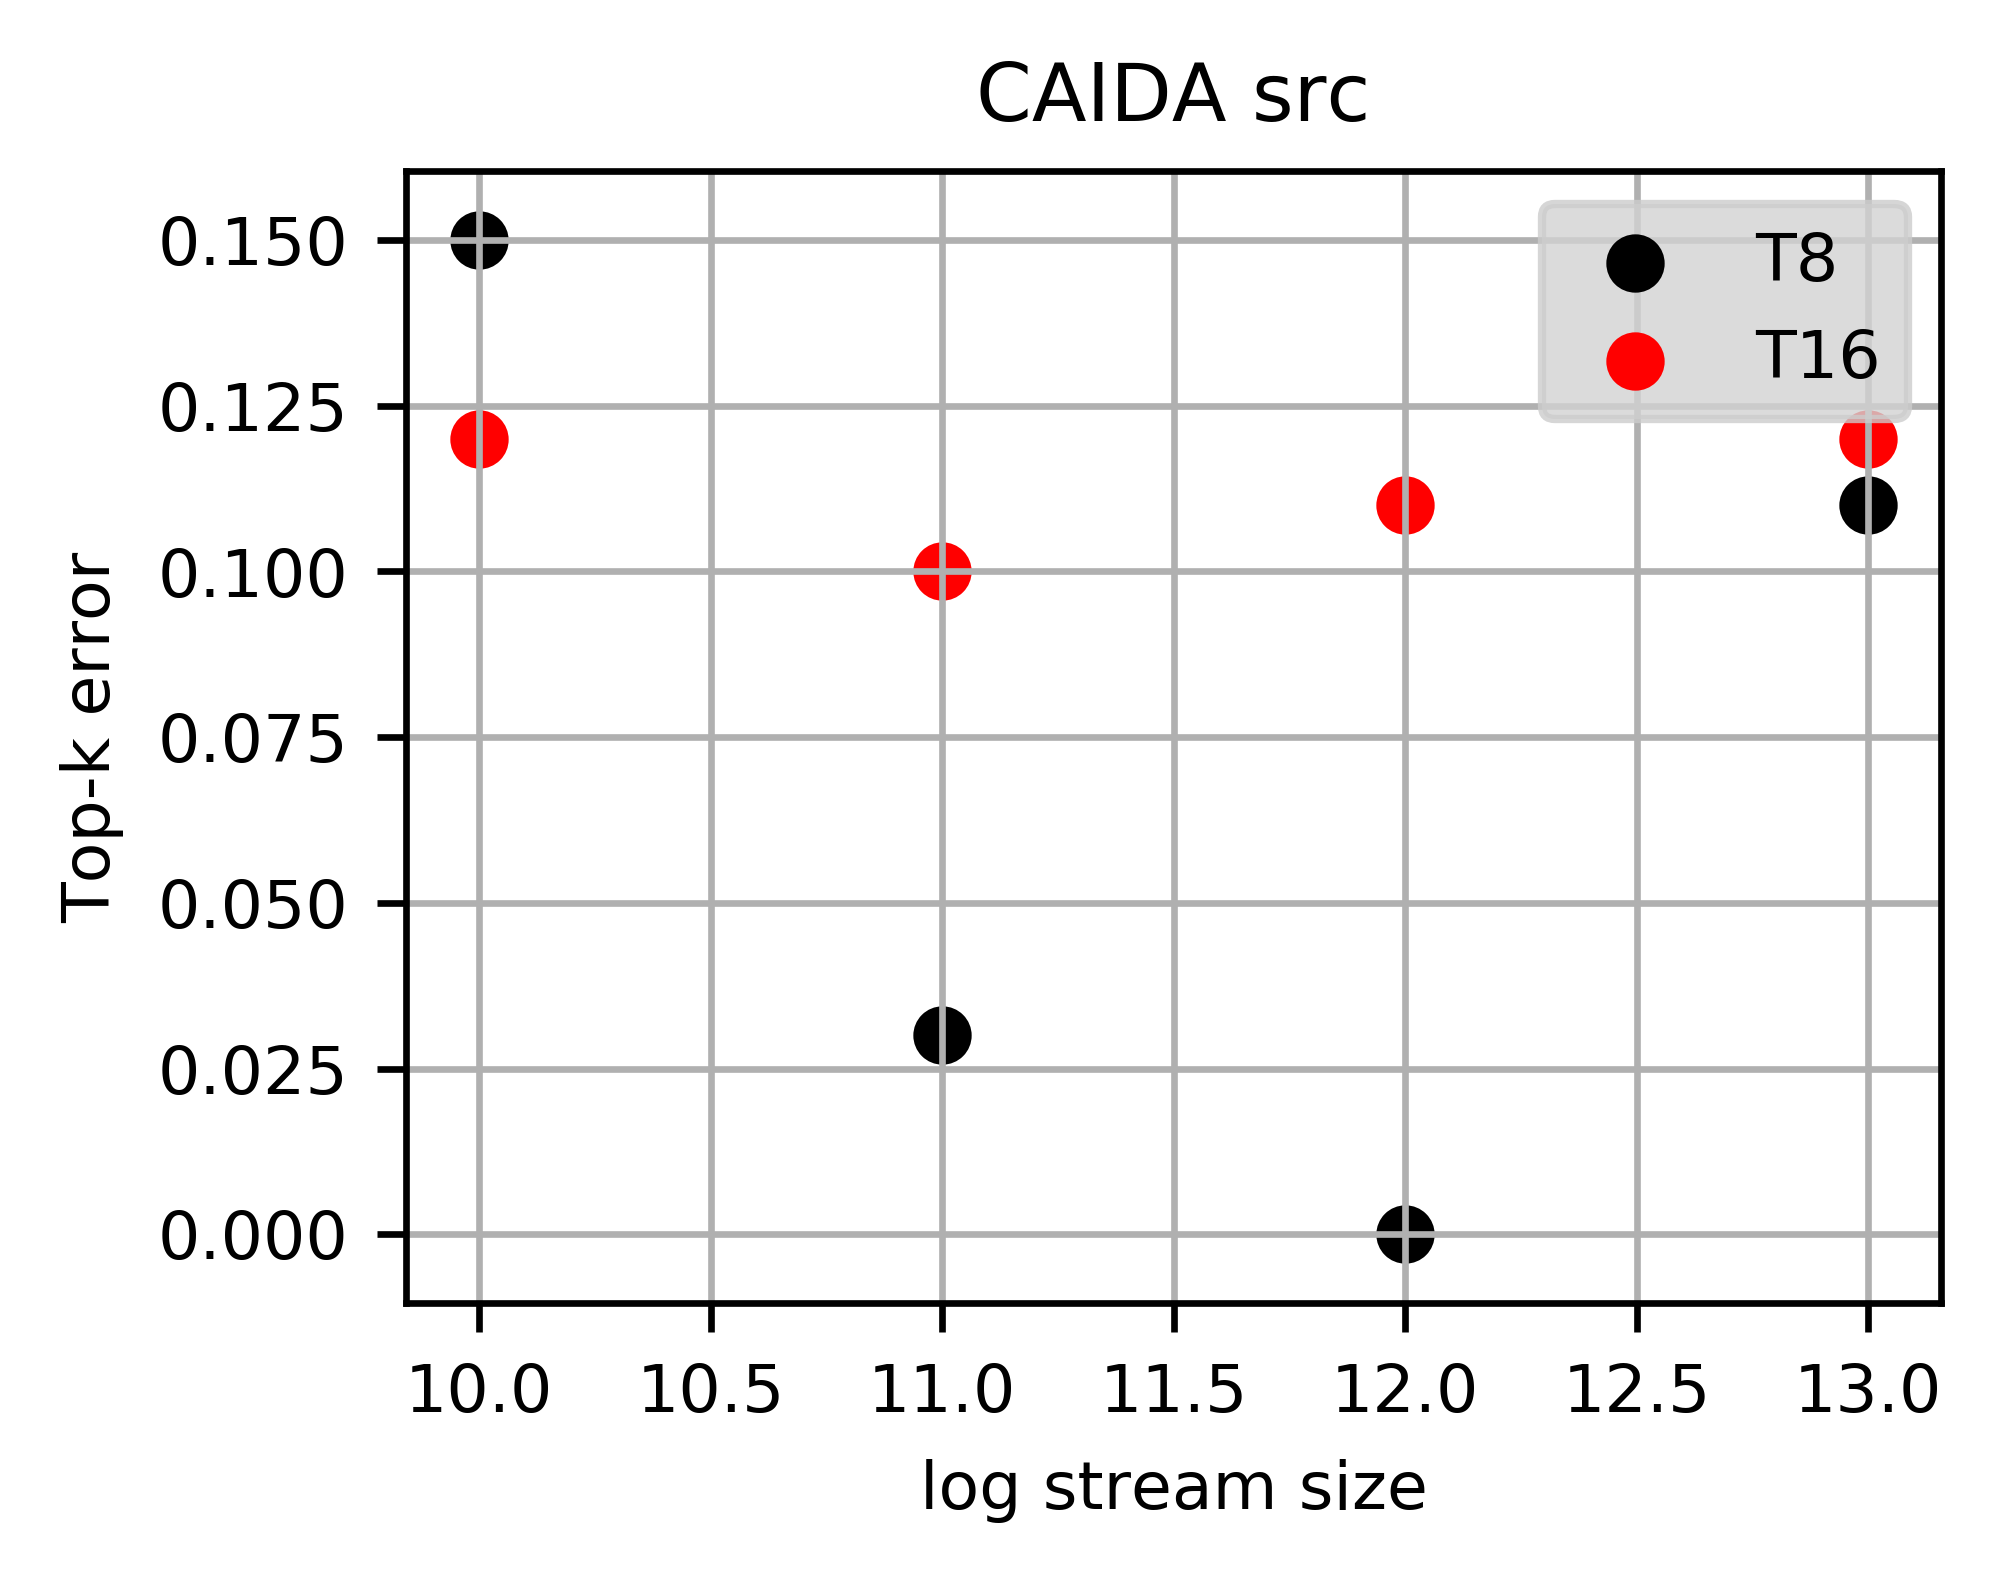

In [378]:
get_folder_plots('out_src',save=True)